In [281]:
# general libraries
import pandas as pd
import numpy as np
import warnings
import time
import re
from tqdm import tqdm
from collections import Counter
warnings.filterwarnings("ignore")
import pickle

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
import graphviz
from sklearn.tree import export_graphviz
from termcolor import colored
import plotly.graph_objects as go

# Outlier detection
# import imbalanced-learn
import scipy.stats as stats
from sklearn.ensemble import IsolationForest

# modelling
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
import sklearn

# Undersampling
from imblearn.pipeline import Pipeline, make_pipeline
from imblearn.over_sampling import (SMOTE, ADASYN, BorderlineSMOTE, SVMSMOTE, SMOTEN)
from imblearn.under_sampling import (TomekLinks, NearMiss, AllKNN,
                                     EditedNearestNeighbours, 
                                     RepeatedEditedNearestNeighbours) 
from imblearn.combine import SMOTETomek, SMOTEENN

from sklearn.model_selection import (train_test_split, GridSearchCV,
                                     StratifiedKFold)

# eval metrics
from sklearn.metrics import (precision_score, recall_score, f1_score)
from sklearn.model_selection import cross_validate
import shap
shap.initjs()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Jamie\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# 1) Data Preparation

### 1.1) Import Data

In [ ]:
df_raw = pd.read_csv(r"C:\Users\Jamie\esk\esk_sprint2\project_sprint2\data_exploration\phl_schp_deped_clean.csv")

In [ ]:
print(df_raw.shape)
df_raw.head()

### 1.2) Final Columns

In [ ]:
final_cols = ['school_type', 'region', 'province', 'legislative', 'division',  'total_enrollees', 'total_instructors',
'poverty_incidence_among_families', 'population_as_of_may_2020', 'unemployment_rate_per_region']

In [ ]:
df = df_raw.copy(deep=True)

In [ ]:
df = df[final_cols]

In [ ]:
df.head()

In [ ]:
to_drop = []

for col in tqdm(df.columns):
    if df[col].dtype == 'O': # if data is an object type
        dummies = pd.get_dummies(df[col], prefix=col, drop_first=False) # create binary/dummy variable, using column name as the prefix
        df = pd.concat([df, dummies], axis=1) # 
        to_drop.append(col)

df = df.drop(to_drop, axis=1)
print(df.shape)
df.head()

### 1.3) Save data set

In [ ]:
df.to_csv(r"C:\Users\Jamie\esk\esk_sprint2\project_sprint2\data_exploration\final_ohe_data.csv")

-------------

# 2) Modeling
- Logistic
- Decision Tree

In [14]:
df = pd.read_csv(r"C:\Users\Jamie\esk\esk_sprint2\project_sprint2\data_exploration\final_ohe_data.csv")

In [15]:
print(df.shape)
df.head()

(15037, 304)


,Unnamed: 0,school_type,total_enrollees,total_instructors,poverty_incidence_among_families,population_as_of_may_2020,unemployment_rate_per_region,region_ARMM,region_CAR,region_CARAGA,region_NCR,region_REGION I,region_REGION II,region_REGION III,region_REGION IVA,region_REGION IVB,region_REGION IX,region_REGION V,region_REGION VI,region_REGION VII,region_REGION VIII,region_REGION X,region_REGION XI,region_REGION XII,province_ABRA,province_AGUSAN DEL NORTE,province_AGUSAN DEL SUR,province_AKLAN,province_ALBAY,province_ANTIQUE,province_APAYAO,province_AURORA,province_BASILAN,province_BATAAN,province_BATANES,province_BATANGAS,province_BENGUET,province_BILIRAN,province_BOHOL,province_BUKIDNON,province_BULACAN,province_CAGAYAN,province_CAMARINES NORTE,province_CAMARINES SUR,province_CAMIGUIN,province_CAPIZ,province_CATANDUANES,province_CAVITE,province_CEBU,province_CITY OF COTABATO,province_COMPOSTELA VALLEY,province_DAVAO DEL NORTE,province_DAVAO DEL SUR,province_DAVAO ORIENTAL,province_DINAGAT ISLANDS,province_EASTERN SAMAR,province_GUIMARAS,province_IFUGAO,province_ILOCOS NORTE,province_ILOCOS SUR,province_ILOILO,province_ISABELA,province_KALINGA,province_LA UNION,province_LAGUNA,province_LANAO DEL NORTE,province_LANAO DEL SUR,province_LEYTE,province_MAGUINDANAO,"province_MANILA, NCR, FIRST DISTRICT",province_MARINDUQUE,province_MASBATE,province_MISAMIS OCCIDENTAL,province_MISAMIS ORIENTAL,province_MOUNTAIN PROVINCE,province_NCR FOURTH DISTRICT,province_NCR SECOND DISTRICT,province_NCR THIRD DISTRICT,province_NEGROS OCCIDENTAL,province_NEGROS ORIENTAL,province_NORTH COTABATO,province_NORTHERN SAMAR,province_NUEVA ECIJA,province_OCCIDENTAL MINDORO,province_ORIENTAL MINDORO,province_PALAWAN,province_PAMPANGA,province_PANGASINAN,province_QUEZON,province_QUIRINO,province_RIZAL,province_ROMBLON,province_SARANGANI,province_SIQUIJOR,province_SORSOGON,province_SOUTH COTABATO,province_SOUTHERN LEYTE,province_SULTAN KUDARAT,province_SULU,province_SURIGAO DEL NORTE,province_SURIGAO DEL SUR,province_TARLAC,province_TAWI-TAWI,province_WESTERN SAMAR,province_ZAMBALES,province_ZAMBOANGA DEL NORTE,province_ZAMBOANGA DEL SUR,province_ZAMBOANGA SIBUGAY,legislative_1ST,legislative_2ND,legislative_3RD,legislative_4TH,legislative_5TH,legislative_6TH,legislative_7TH,legislative_LONE,division_ABRA,division_AGUSAN DEL NORTE,division_AGUSAN DEL SUR,division_AKLAN,division_ALAMINOS CITY,division_ALBAY,division_ANGELES CITY,division_ANTIPOLO CITY,division_ANTIQUE,division_APAYAO,division_AURORA,division_BACOLOD CITY,division_BAGO CITY,division_BAGUIO CITY,division_BAIS CITY,division_BALANGA CITY,division_BASILAN,division_BATAAN,division_BATANES,division_BATANGAS,division_BATANGAS CITY,division_BAYAWAN CITY,division_BENGUET,division_BILIRAN,division_BISLIG CITY,division_BOGO CITY,division_BOHOL,division_BUKIDNON,division_BULACAN,division_BUTUAN CITY,division_CABANATUAN CITY,division_CADIZ CITY,division_CAGAYAN,division_CAGAYAN DE ORO CITY,division_CALAMBA CITY,division_CALAPAN CITY,division_CALBAYOG CITY,division_CALOOCAN CITY,division_CAMARINES NORTE,division_CAMARINES SUR,division_CAMIGUIN,division_CANDON CITY,division_CAPIZ,division_CARCAR CITY,division_CATANDUANES,division_CAUAYAN CITY,division_CAVITE,division_CAVITE CITY,division_CEBU,division_CEBU CITY,division_CITY OF NAGA CEBU,division_CITY OF SAN JUAN,division_COMPOSTELA VALLEY,division_COTABATO CITY,division_DAGUPAN CITY,division_DANAO CITY,division_DASMARINAS CITY,division_DAVAO CITY,division_DAVAO DEL NORTE,division_DAVAO DEL SUR,division_DAVAO ORIENTAL,division_DIGOS CITY,division_DINAGAT ISLAND,division_DIPOLOG CITY,division_DUMAGUETE CITY,division_EASTERN SAMAR,division_ESCALANTE CITY,division_GAPAN CITY,division_GENERAL SANTOS CITY,division_GINGOOG CITY,division_GUIHULNGAN CITY,division_GUIMARAS,division_IFUGAO,division_ILIGAN CITY,division_ILOCOS NORTE,division_ILOCOS SUR,division_ILOILO,division_ILOILO CITY,division_IRIGA CITY,division_ISABELA,division_ISLAND GARDEN CITY OF SAMAL,division_

In [16]:
df.drop(labels='Unnamed: 0', axis=1, inplace=True)
print(df.shape)
df.head()

(15037, 303)


,school_type,total_enrollees,total_instructors,poverty_incidence_among_families,population_as_of_may_2020,unemployment_rate_per_region,region_ARMM,region_CAR,region_CARAGA,region_NCR,region_REGION I,region_REGION II,region_REGION III,region_REGION IVA,region_REGION IVB,region_REGION IX,region_REGION V,region_REGION VI,region_REGION VII,region_REGION VIII,region_REGION X,region_REGION XI,region_REGION XII,province_ABRA,province_AGUSAN DEL NORTE,province_AGUSAN DEL SUR,province_AKLAN,province_ALBAY,province_ANTIQUE,province_APAYAO,province_AURORA,province_BASILAN,province_BATAAN,province_BATANES,province_BATANGAS,province_BENGUET,province_BILIRAN,province_BOHOL,province_BUKIDNON,province_BULACAN,province_CAGAYAN,province_CAMARINES NORTE,province_CAMARINES SUR,province_CAMIGUIN,province_CAPIZ,province_CATANDUANES,province_CAVITE,province_CEBU,province_CITY OF COTABATO,province_COMPOSTELA VALLEY,province_DAVAO DEL NORTE,province_DAVAO DEL SUR,province_DAVAO ORIENTAL,province_DINAGAT ISLANDS,province_EASTERN SAMAR,province_GUIMARAS,province_IFUGAO,province_ILOCOS NORTE,province_ILOCOS SUR,province_ILOILO,province_ISABELA,province_KALINGA,province_LA UNION,province_LAGUNA,province_LANAO DEL NORTE,province_LANAO DEL SUR,province_LEYTE,province_MAGUINDANAO,"province_MANILA, NCR, FIRST DISTRICT",province_MARINDUQUE,province_MASBATE,province_MISAMIS OCCIDENTAL,province_MISAMIS ORIENTAL,province_MOUNTAIN PROVINCE,province_NCR FOURTH DISTRICT,province_NCR SECOND DISTRICT,province_NCR THIRD DISTRICT,province_NEGROS OCCIDENTAL,province_NEGROS ORIENTAL,province_NORTH COTABATO,province_NORTHERN SAMAR,province_NUEVA ECIJA,province_OCCIDENTAL MINDORO,province_ORIENTAL MINDORO,province_PALAWAN,province_PAMPANGA,province_PANGASINAN,province_QUEZON,province_QUIRINO,province_RIZAL,province_ROMBLON,province_SARANGANI,province_SIQUIJOR,province_SORSOGON,province_SOUTH COTABATO,province_SOUTHERN LEYTE,province_SULTAN KUDARAT,province_SULU,province_SURIGAO DEL NORTE,province_SURIGAO DEL SUR,province_TARLAC,province_TAWI-TAWI,province_WESTERN SAMAR,province_ZAMBALES,province_ZAMBOANGA DEL NORTE,province_ZAMBOANGA DEL SUR,province_ZAMBOANGA SIBUGAY,legislative_1ST,legislative_2ND,legislative_3RD,legislative_4TH,legislative_5TH,legislative_6TH,legislative_7TH,legislative_LONE,division_ABRA,division_AGUSAN DEL NORTE,division_AGUSAN DEL SUR,division_AKLAN,division_ALAMINOS CITY,division_ALBAY,division_ANGELES CITY,division_ANTIPOLO CITY,division_ANTIQUE,division_APAYAO,division_AURORA,division_BACOLOD CITY,division_BAGO CITY,division_BAGUIO CITY,division_BAIS CITY,division_BALANGA CITY,division_BASILAN,division_BATAAN,division_BATANES,division_BATANGAS,division_BATANGAS CITY,division_BAYAWAN CITY,division_BENGUET,division_BILIRAN,division_BISLIG CITY,division_BOGO CITY,division_BOHOL,division_BUKIDNON,division_BULACAN,division_BUTUAN CITY,division_CABANATUAN CITY,division_CADIZ CITY,division_CAGAYAN,division_CAGAYAN DE ORO CITY,division_CALAMBA CITY,division_CALAPAN CITY,division_CALBAYOG CITY,division_CALOOCAN CITY,division_CAMARINES NORTE,division_CAMARINES SUR,division_CAMIGUIN,division_CANDON CITY,division_CAPIZ,division_CARCAR CITY,division_CATANDUANES,division_CAUAYAN CITY,division_CAVITE,division_CAVITE CITY,division_CEBU,division_CEBU CITY,division_CITY OF NAGA CEBU,division_CITY OF SAN JUAN,division_COMPOSTELA VALLEY,division_COTABATO CITY,division_DAGUPAN CITY,division_DANAO CITY,division_DASMARINAS CITY,division_DAVAO CITY,division_DAVAO DEL NORTE,division_DAVAO DEL SUR,division_DAVAO ORIENTAL,division_DIGOS CITY,division_DINAGAT ISLAND,division_DIPOLOG CITY,division_DUMAGUETE CITY,division_EASTERN SAMAR,division_ESCALANTE CITY,division_GAPAN CITY,division_GENERAL SANTOS CITY,division_GINGOOG CITY,division_GUIHULNGAN CITY,division_GUIMARAS,division_IFUGAO,division_ILIGAN CITY,division_ILOCOS NORTE,division_ILOCOS SUR,division_ILOILO,division_ILOILO CITY,division_IRIGA CITY,division_ISABELA,division_ISLAND GARDEN CITY OF SAMAL,division_KABANKALAN 

In [17]:
X = df.drop(['school_type'], axis=1)
y = df['school_type']

(X_trainval, X_holdout, y_trainval, y_holdout) = train_test_split(X, y, 
                                                                  random_state=890,
                                                                  test_size=0.25,
                                                                  stratify=y)

In [18]:
print(X.shape)
X.head()

(15037, 302)


,total_enrollees,total_instructors,poverty_incidence_among_families,population_as_of_may_2020,unemployment_rate_per_region,region_ARMM,region_CAR,region_CARAGA,region_NCR,region_REGION I,region_REGION II,region_REGION III,region_REGION IVA,region_REGION IVB,region_REGION IX,region_REGION V,region_REGION VI,region_REGION VII,region_REGION VIII,region_REGION X,region_REGION XI,region_REGION XII,province_ABRA,province_AGUSAN DEL NORTE,province_AGUSAN DEL SUR,province_AKLAN,province_ALBAY,province_ANTIQUE,province_APAYAO,province_AURORA,province_BASILAN,province_BATAAN,province_BATANES,province_BATANGAS,province_BENGUET,province_BILIRAN,province_BOHOL,province_BUKIDNON,province_BULACAN,province_CAGAYAN,province_CAMARINES NORTE,province_CAMARINES SUR,province_CAMIGUIN,province_CAPIZ,province_CATANDUANES,province_CAVITE,province_CEBU,province_CITY OF COTABATO,province_COMPOSTELA VALLEY,province_DAVAO DEL NORTE,province_DAVAO DEL SUR,province_DAVAO ORIENTAL,province_DINAGAT ISLANDS,province_EASTERN SAMAR,province_GUIMARAS,province_IFUGAO,province_ILOCOS NORTE,province_ILOCOS SUR,province_ILOILO,province_ISABELA,province_KALINGA,province_LA UNION,province_LAGUNA,province_LANAO DEL NORTE,province_LANAO DEL SUR,province_LEYTE,province_MAGUINDANAO,"province_MANILA, NCR, FIRST DISTRICT",province_MARINDUQUE,province_MASBATE,province_MISAMIS OCCIDENTAL,province_MISAMIS ORIENTAL,province_MOUNTAIN PROVINCE,province_NCR FOURTH DISTRICT,province_NCR SECOND DISTRICT,province_NCR THIRD DISTRICT,province_NEGROS OCCIDENTAL,province_NEGROS ORIENTAL,province_NORTH COTABATO,province_NORTHERN SAMAR,province_NUEVA ECIJA,province_OCCIDENTAL MINDORO,province_ORIENTAL MINDORO,province_PALAWAN,province_PAMPANGA,province_PANGASINAN,province_QUEZON,province_QUIRINO,province_RIZAL,province_ROMBLON,province_SARANGANI,province_SIQUIJOR,province_SORSOGON,province_SOUTH COTABATO,province_SOUTHERN LEYTE,province_SULTAN KUDARAT,province_SULU,province_SURIGAO DEL NORTE,province_SURIGAO DEL SUR,province_TARLAC,province_TAWI-TAWI,province_WESTERN SAMAR,province_ZAMBALES,province_ZAMBOANGA DEL NORTE,province_ZAMBOANGA DEL SUR,province_ZAMBOANGA SIBUGAY,legislative_1ST,legislative_2ND,legislative_3RD,legislative_4TH,legislative_5TH,legislative_6TH,legislative_7TH,legislative_LONE,division_ABRA,division_AGUSAN DEL NORTE,division_AGUSAN DEL SUR,division_AKLAN,division_ALAMINOS CITY,division_ALBAY,division_ANGELES CITY,division_ANTIPOLO CITY,division_ANTIQUE,division_APAYAO,division_AURORA,division_BACOLOD CITY,division_BAGO CITY,division_BAGUIO CITY,division_BAIS CITY,division_BALANGA CITY,division_BASILAN,division_BATAAN,division_BATANES,division_BATANGAS,division_BATANGAS CITY,division_BAYAWAN CITY,division_BENGUET,division_BILIRAN,division_BISLIG CITY,division_BOGO CITY,division_BOHOL,division_BUKIDNON,division_BULACAN,division_BUTUAN CITY,division_CABANATUAN CITY,division_CADIZ CITY,division_CAGAYAN,division_CAGAYAN DE ORO CITY,division_CALAMBA CITY,division_CALAPAN CITY,division_CALBAYOG CITY,division_CALOOCAN CITY,division_CAMARINES NORTE,division_CAMARINES SUR,division_CAMIGUIN,division_CANDON CITY,division_CAPIZ,division_CARCAR CITY,division_CATANDUANES,division_CAUAYAN CITY,division_CAVITE,division_CAVITE CITY,division_CEBU,division_CEBU CITY,division_CITY OF NAGA CEBU,division_CITY OF SAN JUAN,division_COMPOSTELA VALLEY,division_COTABATO CITY,division_DAGUPAN CITY,division_DANAO CITY,division_DASMARINAS CITY,division_DAVAO CITY,division_DAVAO DEL NORTE,division_DAVAO DEL SUR,division_DAVAO ORIENTAL,division_DIGOS CITY,division_DINAGAT ISLAND,division_DIPOLOG CITY,division_DUMAGUETE CITY,division_EASTERN SAMAR,division_ESCALANTE CITY,division_GAPAN CITY,division_GENERAL SANTOS CITY,division_GINGOOG CITY,division_GUIHULNGAN CITY,division_GUIMARAS,division_IFUGAO,division_ILIGAN CITY,division_ILOCOS NORTE,division_ILOCOS SUR,division_ILOILO,division_ILOILO CITY,division_IRIGA CITY,division_ISABELA,division_ISLAND GARDEN CITY OF SAMAL,division_KABANKALAN CITY,divisio

In [19]:
print(y.shape)
y.head()

(15037,)


0    0
1    1
2    1
3    1
4    1
Name: school_type, dtype: int64

In [20]:
def auto_ml(X, y, models_dict, scaler=None, cv=None, res_t=None):
    """Apply resampling for imbalanced data"""
    results = {}
    results2 = {}

    # log start time
    total_start = time.time()

    for model_name, model in tqdm(models_dict.items()):
        
        ################# this portion can be edited ###############
        train_scores = []
        val_scores = []

        train_recall = []
        val_recall = []

        ###########################################################

        for train_index, val_index in tqdm(cv.split(X, y)):

            X_train, X_val = X.iloc[train_index], X.iloc[val_index]
            y_train, y_val = y.iloc[train_index], y.iloc[val_index]

            # Apply scaling
            if scaler is not None:
                X_train['population_as_of_may_2020'] = scaler.fit_transform(X_train['population_as_of_may_2020'].values.reshape(-1, 1))
                X_val['population_as_of_may_2020']   = scaler.fit_transform(X_val['population_as_of_may_2020'].values.reshape(-1, 1))
#                 X_train = scaler.fit_transform(X_train)
#                 X_val   = scaler.transform(X_val)
            else:
                pass

            # Apply resampling
            if res_t is not None:
                s = time.time()
                X_train, y_train = res_t.fit_resample(X_train, y_train)
                print(f'Resampling done in {time.time() - s}')
            else:
                pass

            start_time = time.time()

            # fit
            model.fit(X_train, y_train)

            # predict
            train_preds = model.predict(X_train)
            val_preds = model.predict(X_val)
            
            ################# this portion can be edited ###############

            # classification accuracy
            train_scores.append(model.score(X_train, y_train))
            val_scores.append(model.score(X_val, y_val))

            # recall
            train_recall.append(recall_score(y_train, train_preds))
            val_recall.append(recall_score(y_val, val_preds))

            end_time = time.time()

            results[model_name] = {
                'Train Accuracy': np.round(np.mean(train_scores) * 100, 2),
                'Val Accuracy': np.round(np.mean(val_scores) * 100, 2),
                'Train Recall': np.round(np.mean(train_recall) * 100, 2),
                'Val Recall': np.round(np.mean(val_recall) * 100, 2),
                'Run Time': end_time - start_time
            }

            results2[model_name] = {
                'Train Accuracy': '{:.2f}%'.format(np.round(np.mean(train_scores)*100, 2)),
                'Val Accuracy': '{:.2f}%'.format(np.round(np.mean(val_scores)*100, 2)),
                'Train Recall': '{:.2f}%'.format(np.round(np.mean(train_recall)*100, 2)),
                'Val Recall': '{:.2f}%'.format(np.round(np.mean(val_recall)*100, 2)),
                'Run Time': end_time - start_time
            }
            
            ###########################################################

    results = pd.DataFrame(results).T
    results2 = pd.DataFrame(results2).T
    return [results, results2]

In [21]:
models_dict = {'LogisticRegressor': LogisticRegression(C=1e-8, max_iter=100000, random_state=890)}

### BASELINE

In [22]:
auto_run = auto_ml(X_trainval, y_trainval, models_dict,
                   scaler=StandardScaler(),
                   cv=StratifiedKFold(n_splits=5))
auto = auto_run[0]
auto_run[1]

  0%|          | 0/1 [00:00<?, ?it/s]
0it [00:00, ?it/s]
1it [00:00,  2.74it/s]
2it [00:00,  2.79it/s]
3it [00:01,  2.85it/s]
4it [00:01,  2.93it/s]
5it [00:01,  2.86it/s]
100%|██████████| 1/1 [00:01<00:00,  1.77s/it]


,Run Time,Train Accuracy,Train Recall,Val Accuracy,Val Recall
LogisticRegressor,0.235613,98.80%,100.00%,98.80%,100.00%


### WITH SAMPLING

In [23]:
res_list = [('Random UnderSamp', RandomUnderSampler(random_state=890)),
            ('Random OverSamp', RandomOverSampler(random_state=890)),
            ('TomekLinks', TomekLinks(sampling_strategy='not majority')),
            ('NearMiss', NearMiss())]


outputs = []
for title, res in res_list:
    print(colored(title, 'red', attrs=['bold']).center(120, "-"))
    
    var = auto_ml(X_trainval, y_trainval,
                  models_dict,
                  scaler=StandardScaler(),
                  cv=StratifiedKFold(n_splits=5), res_t=res)
    
    outputs.append(var[0])
    display(var[1])

---------------------------------------------Random UnderSamp----------------------------------------------


  0%|          | 0/1 [00:00<?, ?it/s]
0it [00:00, ?it/s]

Resampling done in 0.07820892333984375


1it [00:00,  3.54it/s]


2it [00:00,  3.69it/s]

Resampling done in 0.08811497688293457



3it [00:00,  3.40it/s]

Resampling done in 0.0914466381072998



4it [00:01,  3.45it/s]

Resampling done in 0.0960087776184082



5it [00:01,  3.43it/s]
100%|██████████| 1/1 [00:01<00:00,  1.47s/it]

Resampling done in 0.09888219833374023


,Run Time,Train Accuracy,Train Recall,Val Accuracy,Val Recall
LogisticRegressor,0.090358,50.93%,40.37%,41.19%,41.07%


----------------------------------------------Random OverSamp----------------------------------------------


  0%|          | 0/1 [00:00<?, ?it/s]
0it [00:00, ?it/s]

Resampling done in 0.3906264305114746



1it [00:00,  1.16it/s]

Resampling done in 0.3937041759490967



2it [00:02,  1.05s/it]

Resampling done in 0.6046922206878662



3it [00:03,  1.09s/it]

Resampling done in 0.38657712936401367



4it [00:04,  1.02s/it]

Resampling done in 0.39165711402893066



5it [00:05,  1.02s/it]
100%|██████████| 1/1 [00:05<00:00,  5.10s/it]


,Run Time,Train Accuracy,Train Recall,Val Accuracy,Val Recall
LogisticRegressor,0.44029,51.64%,40.12%,40.57%,40.34%


------------------------------------------------TomekLinks-------------------------------------------------


  0%|          | 0/1 [00:00<?, ?it/s]
0it [00:00, ?it/s]

Resampling done in 5.220512628555298



1it [00:05,  5.64s/it]

Resampling done in 4.125149250030518



2it [00:10,  5.01s/it]

Resampling done in 4.0634605884552



3it [00:14,  4.78s/it]

Resampling done in 4.248151063919067



4it [00:19,  4.75s/it]

Resampling done in 4.307542085647583



5it [00:24,  4.83s/it]
100%|██████████| 1/1 [00:24<00:00, 24.18s/it]


,Run Time,Train Accuracy,Train Recall,Val Accuracy,Val Recall
LogisticRegressor,0.282586,99.33%,100.00%,98.80%,100.00%


-------------------------------------------------NearMiss--------------------------------------------------


  0%|          | 0/1 [00:00<?, ?it/s]
0it [00:00, ?it/s]
1it [00:00,  1.52it/s]

Resampling done in 0.3409585952758789



2it [00:01,  1.84it/s]

Resampling done in 0.18891620635986328



3it [00:01,  2.12it/s]

Resampling done in 0.19211125373840332



4it [00:01,  2.17it/s]

Resampling done in 0.24135041236877441



5it [00:02,  2.15it/s]
100%|██████████| 1/1 [00:02<00:00,  2.33s/it]

Resampling done in 0.18760895729064941


,Run Time,Train Accuracy,Train Recall,Val Accuracy,Val Recall
LogisticRegressor,0.062515,50.00%,0.00%,1.20%,0.00%


In [13]:
perfs = pd.DataFrame()

In [14]:
auto_run[0]['Type'] = 'Base'
perfs = pd.concat([auto_run[0], perfs.loc[:]]).reset_index()
perfs.drop(labels=['index'], axis=1, inplace=True)
perfs

,Run Time,Train Accuracy,Train Recall,Val Accuracy,Val Recall,Type
0,0.22525,98.8,100.0,98.8,100.0,Base


In [15]:
outputs[0]['Type'] = 'Random Under Sampling'
perfs = pd.concat([outputs[0], perfs.loc[-1:]]).reset_index()
perfs.drop(labels=['index'], axis=1, inplace=True)
perfs

,Run Time,Train Accuracy,Train Recall,Val Accuracy,Val Recall,Type
0,0.052569,50.93,40.37,41.19,41.07,Random Under Sampling
1,0.225250,98.80,100.00,98.80,100.00,Base


In [16]:
outputs[1]['Type'] = 'TomekLinks'
perfs = pd.concat([outputs[1], perfs.loc[:]]).reset_index()
perfs.drop(labels=['index'], axis=1, inplace=True)
perfs

,Run Time,Train Accuracy,Train Recall,Val Accuracy,Val Recall,Type
0,0.437529,51.64,40.12,40.57,40.34,TomekLinks
1,0.052569,50.93,40.37,41.19,41.07,Random Under Sampling
2,0.225250,98.80,100.00,98.80,100.00,Base


In [17]:
outputs[2]['Type'] = 'NearMiss'
perfs = pd.concat([outputs[2], perfs.loc[:]]).reset_index()
perfs.drop(labels=['index'], axis=1, inplace=True)
perfs

,Run Time,Train Accuracy,Train Recall,Val Accuracy,Val Recall,Type
0,0.235096,99.33,100.00,98.80,100.00,NearMiss
1,0.437529,51.64,40.12,40.57,40.34,TomekLinks
2,0.052569,50.93,40.37,41.19,41.07,Random Under Sampling
3,0.225250,98.80,100.00,98.80,100.00,Base


In [18]:
perfs['Acc Difference'] = perfs['Train Accuracy'] - perfs['Val Accuracy']
perfs['Recall Difference'] = perfs['Train Recall'] - perfs['Val Recall']
perfs

,Run Time,Train Accuracy,Train Recall,Val Accuracy,Val Recall,Type,Acc Difference,Recall Difference
0,0.235096,99.33,100.00,98.80,100.00,NearMiss,0.53,0.00
1,0.437529,51.64,40.12,40.57,40.34,TomekLinks,11.07,-0.22
2,0.052569,50.93,40.37,41.19,41.07,Random Under Sampling,9.74,-0.70
3,0.225250,98.80,100.00,98.80,100.00,Base,0.00,0.00


-------------------

### Hypertuning
Using **Random Under Sampling**

In [24]:
def train_lr(X, y, metric, res_t=None, hypertune=False, resample=False):
    params = {"C": [1e-8, 1e-5, 1e-3, 0.1, 0.2, 0.4, 0.75, 1]
             }
    new_params = {'logisticregression__' +
                  key: params[key] for key in params}

    skf = StratifiedKFold(n_splits=5)
    
    if resample is True:
        imba_pipeline = make_pipeline(StandardScaler(),
                                      res_t,
                                      LogisticRegression(random_state=890))
    else:
        imba_pipeline = make_pipeline(StandardScaler(),
                                      LogisticRegression(random_state=890))

    if hypertune is True:
        clf = GridSearchCV(imba_pipeline, param_grid=new_params,
                           cv=skf, scoring=metric, return_train_score=True,
                          verbose=10)
        start_time = time.time()
        clf.fit(X, y)
        run_time = (time.time() - start_time)
        model = clf.best_estimator_.fit(X, y)
        return ['LogisticRegression', np.mean(clf.cv_results_['mean_train_score']),
                clf.best_score_, 'Best parameters = {0}'.format(
                    clf.best_params_),
                run_time, model]
    else:
        clf = imba_pipeline
        start_time = time.time()
        clf.fit(X, y)
        run_time = (time.time() - start_time)
        cv_scores = cross_validate(estimator=clf, X=X, y=y,
                                   scoring=metric, cv=skf, n_jobs=-1,
                                   return_train_score=True)

        return ['LogisticRegression', np.mean(cv_scores['train_score']),
                np.mean(cv_scores['test_score']), run_time, clf]

In [25]:
start_time = time.time()
lr_tk_rec = train_lr(X_trainval, y_trainval, 'recall', RandomUnderSampler(random_state=890),
                       hypertune=True, resample=True)
start_time = time.time()
lr_tk_acc = train_lr(X_trainval, y_trainval, 'accuracy', RandomUnderSampler(random_state=890),
                      hypertune=True, resample=True)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5; 1/8] START logisticregression__C=1e-08.................................
[CV 1/5; 1/8] END logisticregression__C=1e-08;, score=(train=0.543, test=0.528) total time=   0.1s
[CV 2/5; 1/8] START logisticregression__C=1e-08.................................
[CV 2/5; 1/8] END logisticregression__C=1e-08;, score=(train=0.652, test=0.653) total time=   0.1s
[CV 3/5; 1/8] START logisticregression__C=1e-08.................................
[CV 3/5; 1/8] END logisticregression__C=1e-08;, score=(train=0.635, test=0.641) total time=   0.1s
[CV 4/5; 1/8] START logisticregression__C=1e-08.................................
[CV 4/5; 1/8] END logisticregression__C=1e-08;, score=(train=0.585, test=0.588) total time=   0.1s
[CV 5/5; 1/8] START logisticregression__C=1e-08.................................
[CV 5/5; 1/8] END logisticregression__C=1e-08;, score=(train=0.622, test=0.642) total time=   0.1s
[CV 1/5; 2/8] START logisticregression__

[CV 1/5; 2/8] END logisticregression__C=1e-05;, score=(train=0.848, test=0.840) total time=   0.1s
[CV 2/5; 2/8] START logisticregression__C=1e-05.................................
[CV 2/5; 2/8] END logisticregression__C=1e-05;, score=(train=0.851, test=0.851) total time=   0.1s
[CV 3/5; 2/8] START logisticregression__C=1e-05.................................
[CV 3/5; 2/8] END logisticregression__C=1e-05;, score=(train=0.638, test=0.643) total time=   0.1s
[CV 4/5; 2/8] START logisticregression__C=1e-05.................................
[CV 4/5; 2/8] END logisticregression__C=1e-05;, score=(train=0.814, test=0.810) total time=   0.1s
[CV 5/5; 2/8] START logisticregression__C=1e-05.................................
[CV 5/5; 2/8] END logisticregression__C=1e-05;, score=(train=0.870, test=0.874) total time=   0.1s
[CV 1/5; 3/8] START logisticregression__C=0.001.................................
[CV 1/5; 3/8] END logisticregression__C=0.001;, score=(train=0.796, test=0.793) total time=   0.3s
[

In [26]:
lr_tk_rec

['LogisticRegression',
 0.7246850258252682,
 0.8069391318775759,
 "Best parameters = {'logisticregression__C': 1e-05}",
 12.641566753387451,
 Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomundersampler', RandomUnderSampler(random_state=890)),
                 ('logisticregression',
                  LogisticRegression(C=1e-05, random_state=890))])]

In [27]:
lr_tk_acc

['LogisticRegression',
 0.7260050595999663,
 0.8037580789734395,
 "Best parameters = {'logisticregression__C': 0.001}",
 12.959071636199951,
 Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomundersampler', RandomUnderSampler(random_state=890)),
                 ('logisticregression',
                  LogisticRegression(C=0.001, random_state=890))])]

In [28]:
cols = ['', 'Train Accuracy', 'Val Accuracy', 'Train Recall', 'Val Recall']
hyper = pd.DataFrame(columns=cols)
hyper.loc[0] = [lr_tk_rec[0],
                np.round(lr_tk_acc[1]*100, 6),
                np.round(lr_tk_acc[2]*100, 6),
                np.round(lr_tk_rec[1]*100, 6),
                np.round(lr_tk_rec[2]*100, 6)]

hyper2 = pd.DataFrame(columns=cols)
hyper2.loc[0] = [lr_tk_rec[0],
                 '{:.2f}%'.format(np.round(lr_tk_acc[1]*100, 2)),
                 '{:.2f}%'.format(np.round(lr_tk_acc[2]*100, 2)),
                 '{:.2f}%'.format(np.round(lr_tk_rec[1]*100, 2)),
                 '{:.2f}%'.format(np.round(lr_tk_rec[2]*100, 2))]
hyper2.style.hide_index()

,Train Accuracy,Val Accuracy,Train Recall,Val Recall
LogisticRegression,72.60%,80.38%,72.47%,80.69%


### Holdout

In [53]:
del rh, y_preds, rh_holdout_score, base_var, base_model, holdout_score

In [54]:
# re-fitting for the holdout
rh               = lr_tk_rec[-1]

rh.fit(X_trainval, y_trainval)
y_preds          = rh.predict(X_holdout)
rh_holdout_score = recall_score(y_holdout, y_preds)

In [55]:
# cross-validation
base_var = train_lr(X_trainval, y_trainval, 'recall', hypertune=False, resample=False)

# re-fitting for the holdout
base_model    = base_var[-1]

In [56]:
cols = ['Method', 'Train Recall', 'Val Recall', 'Holdout Recall']

summary2 = pd.DataFrame(columns=cols)
summary2.loc[0] = ['No Resampling',
                 '{:.2f}%'.format(np.round(base_var[1]*100, 2)),
                 '{:.2f}%'.format(np.round(base_var[2]*100, 2)),
                 '{:.2f}%'.format(np.round(holdout_score*100, 2))]
summary2.loc[3] = ['Resampling x Hypertune',
                 '{:.2f}%'.format(np.round(lr_tk_rec[1]*100, 2)),
                 '{:.2f}%'.format(np.round(lr_tk_rec[2]*100, 2)),
                 '{:.2f}%'.format(np.round(rh_holdout_score*100, 2))]
summary2.style.hide_index()

Method,Train Recall,Val Recall,Holdout Recall
No Resampling,99.99%,99.94%,100.00%
Resampling x Hypertune,72.47%,80.69%,82.93%


-------------------------------------------------------------------------------- TRIAL --------------------------------------------------------------------------------

In [74]:
base_model

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(random_state=890))])

In [76]:
base_model.fit(X_trainval, y_trainval)
y_preds       = base_model.predict(X_holdout)
holdout_score = recall_score(y_holdout, y_preds)

-------------------------------------------------------------------------------- END TRIAL --------------------------------------------------------------------------------

In [29]:
# re-fitting for the holdout
rh = lr_tk_rec[-1]
rh.fit(X_trainval, y_trainval)
y_preds = rh.predict(X_holdout)
rh_holdout_score = recall_score(y_holdout, y_preds)

In [30]:
# cross-validation
base_var = train_lr(X_trainval, y_trainval, 'recall', hypertune=True, resample=True)

# re-fitting for the holdout
base_model = base_var[-1]
base_model.fit(X_trainval, y_trainval)
y_preds = base_model.predict(X_holdout)
holdout_score = recall_score(y_holdout, y_preds)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5; 1/8] START logisticregression__C=1e-08.................................
[CV 1/5; 1/8] END logisticregression__C=1e-08;, score=(train=1.000, test=1.000) total time=   0.2s
[CV 2/5; 1/8] START logisticregression__C=1e-08.................................
[CV 2/5; 1/8] END logisticregression__C=1e-08;, score=(train=1.000, test=1.000) total time=   0.3s
[CV 3/5; 1/8] START logisticregression__C=1e-08.................................
[CV 3/5; 1/8] END logisticregression__C=1e-08;, score=(train=1.000, test=1.000) total time=   0.2s
[CV 4/5; 1/8] START logisticregression__C=1e-08.................................
[CV 4/5; 1/8] END logisticregression__C=1e-08;, score=(train=1.000, test=1.000) total time=   0.2s
[CV 5/5; 1/8] START logisticregression__C=1e-08.................................
[CV 5/5; 1/8] END logisticregression__C=1e-08;, score=(train=1.000, test=1.000) total time=   0.2s
[CV 1/5; 2/8] START logisticregression__

In [31]:
cols = ['Method', 'Train Recall', 'Val Recall', 'Holdout Recall']
summary = pd.DataFrame(columns=cols)
summary.loc[0] = ['No Resampling',
                 '{:.2f}%'.format(np.round(base_var[1]*100, 2)),
                 '{:.2f}%'.format(np.round(base_var[2]*100, 2)),
                 '{:.2f}%'.format(np.round(holdout_score*100, 2))]
summary.loc[3] = ['Resampling x Hypertune',
                 '{:.2f}%'.format(np.round(lr_tk_rec[1]*100, 2)),
                 '{:.2f}%'.format(np.round(lr_tk_rec[2]*100, 2)),
                 '{:.2f}%'.format(np.round(rh_holdout_score*100, 2))]
summary.style.hide_index()

Method,Train Recall,Val Recall,Holdout Recall
No Resampling,99.99%,100.00%,100.00%
Resampling x Hypertune,72.47%,80.69%,82.93%


### Save Model

In [32]:
model = rh['logisticregression']

In [33]:
pickle.dump(model, open(r'C:\Users\Jamie\esk\esk_sprint2\project_sprint2\data_exploration\lr_school_type.pkl', 'wb'))

----

# 3) Model Explainability

Load the model

In [2]:
import joblib
from joblib import dump, load

In [34]:
model = joblib.load(r'C:\Users\Jamie\esk\esk_sprint2\project_sprint2\data_exploration\lr_school_type.pkl')

In [35]:
model

LogisticRegression(C=1e-05, random_state=890)

### 3.0) Confusion Matrix & ROC Curve
**<u> Reference script: </u> <br>**

X, y = make_classification(random_state=0) <br>
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0) <br>
clf = SVC(random_state=0) <br>
clf.fit(X_train, y_train) <br>
SVC(random_state=0) <br>

predictions = clf.predict(X_test) <br>
cm = confusion_matrix(y_test, predictions, labels=clf.classes_) <br>
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_) <br>
disp.plot() <br>
plt.show() <br>

**re-fitting for the holdout**
rh = lr_tk_rec[-1] <br>
rh.fit(X_trainval, y_trainval) <br>
y_preds = rh.predict(X_holdout) <br>
rh_holdout_score = recall_score(y_holdout, y_preds) <br>

**cross-validation** <br>
base_var = train_lr(X_trainval, y_trainval, 'recall', hypertune=True, resample=True) <br>

**re-fitting for the holdout** <br>
base_model = base_var[-1] <br>
base_model.fit(X_trainval, y_trainval) <br>
y_preds = base_model.predict(X_holdout) <br>
holdout_score = recall_score(y_holdout, y_preds)

In [197]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

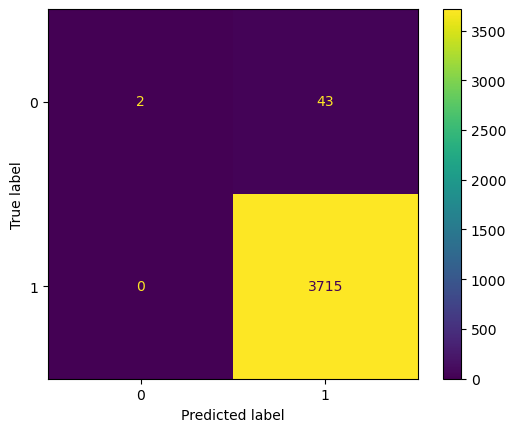

In [198]:
cm = confusion_matrix(y_holdout, y_preds, labels = rh.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm,
                              display_labels = rh.classes_)

disp.plot()
plt.show()

### 3.1) Regression Coefficients

In [36]:
# Model intercept
model.intercept_

array([0.00231732])

In [37]:
# Coefficients
model.coef_

array([[-1.31864278e-04,  1.14316959e-04,  2.32446403e-04,
        -2.27054977e-04, -1.18055549e-04, -1.53707582e-09,
        -1.56276539e-04, -4.44079547e-07, -5.08055807e-04,
         5.04072832e-05,  9.88330083e-05,  1.51183581e-04,
        -1.83676244e-05,  4.65744661e-07,  1.12289499e-04,
         1.16118468e-04,  1.04896477e-04, -2.07198262e-04,
         2.19194675e-04, -9.56795499e-07,  1.47197073e-04,
        -2.63557116e-04,  7.66031383e-05, -1.19373124e-09,
        -3.01862964e-05, -1.03940261e-09, -2.64539275e-09,
         8.43841906e-05, -9.45480671e-08,  5.63977244e-05,
        -6.64420540e-10,  1.69905733e-04, -9.90943467e-10,
         1.34513014e-04, -6.60894027e-05,  5.64431020e-05,
        -1.03940261e-09, -1.10815461e-09, -7.64867486e-08,
         1.05792020e-04, -8.57991691e-10, -2.36523622e-09,
         1.24692705e-04,  9.05767223e-05,  7.36191825e-05,
        -1.25071488e-04, -1.99478395e-07, -6.64420540e-10,
         7.90708920e-05,  1.80885674e-04,  6.17478990e-0

In [38]:
X_holdout.columns

Index(['total_enrollees', 'total_instructors',
       'poverty_incidence_among_families', 'population_as_of_may_2020',
       'unemployment_rate_per_region', 'region_ARMM', 'region_CAR',
       'region_CARAGA', 'region_NCR', 'region_REGION I',
       ...
       'division_TARLAC CITY', 'division_TAWITAWI', 'division_TUGUEGARAO CITY',
       'division_URDANETA CITY', 'division_VALENCIA CITY',
       'division_VALENZUELA CITY', 'division_VIGAN CITY', 'division_ZAMBALES',
       'division_ZAMBOANGA DEL SUR', 'division_ZAMBOANGA SIBUGAY'],
      dtype='object', length=302)

In [39]:
df_coeff = pd.DataFrame(model.coef_, columns = X_holdout.columns)
df_coeff['y_intercept'] = model.intercept_
df_coeff

,total_enrollees,total_instructors,poverty_incidence_among_families,population_as_of_may_2020,unemployment_rate_per_region,region_ARMM,region_CAR,region_CARAGA,region_NCR,region_REGION I,region_REGION II,region_REGION III,region_REGION IVA,region_REGION IVB,region_REGION IX,region_REGION V,region_REGION VI,region_REGION VII,region_REGION VIII,region_REGION X,region_REGION XI,region_REGION XII,province_ABRA,province_AGUSAN DEL NORTE,province_AGUSAN DEL SUR,province_AKLAN,province_ALBAY,province_ANTIQUE,province_APAYAO,province_AURORA,province_BASILAN,province_BATAAN,province_BATANES,province_BATANGAS,province_BENGUET,province_BILIRAN,province_BOHOL,province_BUKIDNON,province_BULACAN,province_CAGAYAN,province_CAMARINES NORTE,province_CAMARINES SUR,province_CAMIGUIN,province_CAPIZ,province_CATANDUANES,province_CAVITE,province_CEBU,province_CITY OF COTABATO,province_COMPOSTELA VALLEY,province_DAVAO DEL NORTE,province_DAVAO DEL SUR,province_DAVAO ORIENTAL,province_DINAGAT ISLANDS,province_EASTERN SAMAR,province_GUIMARAS,province_IFUGAO,province_ILOCOS NORTE,province_ILOCOS SUR,province_ILOILO,province_ISABELA,province_KALINGA,province_LA UNION,province_LAGUNA,province_LANAO DEL NORTE,province_LANAO DEL SUR,province_LEYTE,province_MAGUINDANAO,"province_MANILA, NCR, FIRST DISTRICT",province_MARINDUQUE,province_MASBATE,province_MISAMIS OCCIDENTAL,province_MISAMIS ORIENTAL,province_MOUNTAIN PROVINCE,province_NCR FOURTH DISTRICT,province_NCR SECOND DISTRICT,province_NCR THIRD DISTRICT,province_NEGROS OCCIDENTAL,province_NEGROS ORIENTAL,province_NORTH COTABATO,province_NORTHERN SAMAR,province_NUEVA ECIJA,province_OCCIDENTAL MINDORO,province_ORIENTAL MINDORO,province_PALAWAN,province_PAMPANGA,province_PANGASINAN,province_QUEZON,province_QUIRINO,province_RIZAL,province_ROMBLON,province_SARANGANI,province_SIQUIJOR,province_SORSOGON,province_SOUTH COTABATO,province_SOUTHERN LEYTE,province_SULTAN KUDARAT,province_SULU,province_SURIGAO DEL NORTE,province_SURIGAO DEL SUR,province_TARLAC,province_TAWI-TAWI,province_WESTERN SAMAR,province_ZAMBALES,province_ZAMBOANGA DEL NORTE,province_ZAMBOANGA DEL SUR,province_ZAMBOANGA SIBUGAY,legislative_1ST,legislative_2ND,legislative_3RD,legislative_4TH,legislative_5TH,legislative_6TH,legislative_7TH,legislative_LONE,division_ABRA,division_AGUSAN DEL NORTE,division_AGUSAN DEL SUR,division_AKLAN,division_ALAMINOS CITY,division_ALBAY,division_ANGELES CITY,division_ANTIPOLO CITY,division_ANTIQUE,division_APAYAO,division_AURORA,division_BACOLOD CITY,division_BAGO CITY,division_BAGUIO CITY,division_BAIS CITY,division_BALANGA CITY,division_BASILAN,division_BATAAN,division_BATANES,division_BATANGAS,division_BATANGAS CITY,division_BAYAWAN CITY,division_BENGUET,division_BILIRAN,division_BISLIG CITY,division_BOGO CITY,division_BOHOL,division_BUKIDNON,division_BULACAN,division_BUTUAN CITY,division_CABANATUAN CITY,division_CADIZ CITY,division_CAGAYAN,division_CAGAYAN DE ORO CITY,division_CALAMBA CITY,division_CALAPAN CITY,division_CALBAYOG CITY,division_CALOOCAN CITY,division_CAMARINES NORTE,division_CAMARINES SUR,division_CAMIGUIN,division_CANDON CITY,division_CAPIZ,division_CARCAR CITY,division_CATANDUANES,division_CAUAYAN CITY,division_CAVITE,division_CAVITE CITY,division_CEBU,division_CEBU CITY,division_CITY OF NAGA CEBU,division_CITY OF SAN JUAN,division_COMPOSTELA VALLEY,division_COTABATO CITY,division_DAGUPAN CITY,division_DANAO CITY,division_DASMARINAS CITY,division_DAVAO CITY,division_DAVAO DEL NORTE,division_DAVAO DEL SUR,division_DAVAO ORIENTAL,division_DIGOS CITY,division_DINAGAT ISLAND,division_DIPOLOG CITY,division_DUMAGUETE CITY,division_EASTERN SAMAR,division_ESCALANTE CITY,division_GAPAN CITY,division_GENERAL SANTOS CITY,division_GINGOOG CITY,division_GUIHULNGAN CITY,division_GUIMARAS,division_IFUGAO,division_ILIGAN CITY,division_ILOCOS NORTE,division_ILOCOS SUR,division_ILOILO,division_ILOILO CITY,division_IRIGA CITY,division_ISABELA,division_ISLAND GARDEN CITY OF SAMAL,division_KABANKALAN CITY,divisio

In [40]:
df_coeff = df_coeff.transpose()
print(df_coeff.shape)
df_coeff.head()

(303, 1)


,0
total_enrollees,-0.000132
total_instructors,0.000114
poverty_incidence_among_families,0.000232
population_as_of_may_2020,-0.000227
unemployment_rate_per_region,-0.000118


In [41]:
df_coeff['features'] = df_coeff.index
df_coeff['coefficients'] = df_coeff[0]

df_coeff_fin = df_coeff[['features', 'coefficients']]
df_coeff_fin = df_coeff_fin.reset_index()
df_coeff_fin.drop(labels='index', axis=1, inplace=True)

In [42]:
df_coeff_fin.head()

,features,coefficients
0,total_enrollees,-0.000132
1,total_instructors,0.000114
2,poverty_incidence_among_families,0.000232
3,population_as_of_may_2020,-0.000227
4,unemployment_rate_per_region,-0.000118


**Generating p-values**

In [52]:
from scipy.stats import norm
from sklearn.linear_model import LogisticRegression

In [ ]:
def logit_p1value(model, x):
   
    p1 = model.predict_proba(x)
    n1 = len(p1)
    m1 = len(model.coef_[0]) + 1
    coefs = np.concatenate([model.intercept_, model.coef_[0]])
    x_full = np.matrix(np.insert(np.array(x), 0, 1, axis = 1))
    answ = np.zeros((m1, m1))
    for i in range(n1):
        answ = answ + np.dot(np.transpose(x_full[i, :]), x_full[i, :]) * p1[i,1] * p1[i, 0]
    vcov = np.linalg.inv(np.matrix(answ))
    se = np.sqrt(np.diag(vcov))
    t1 =  coefs/se  
    p1 = (1 - norm.cdf(abs(t1))) * 2
    return p1

x = np.arange(10)[:, np.newaxis]
y = np.array([0,0,0,1,0,0,1,1,1,1])
# model = LogisticRegression(C=1e30).fit(x, y)
print(logit_pvalue(model, x))

import statsmodels.api as sd
sd_model = sd.Logit(y, sm.add_constant(x)).fit(disp=0)
print(sd_model.pvalues)
sd_model.summary()

### 3.2) SHAP

In [43]:
model

LogisticRegression(C=1e-05, random_state=890)

In [44]:
X_holdout.columns

Index(['total_enrollees', 'total_instructors',
       'poverty_incidence_among_families', 'population_as_of_may_2020',
       'unemployment_rate_per_region', 'region_ARMM', 'region_CAR',
       'region_CARAGA', 'region_NCR', 'region_REGION I',
       ...
       'division_TARLAC CITY', 'division_TAWITAWI', 'division_TUGUEGARAO CITY',
       'division_URDANETA CITY', 'division_VALENCIA CITY',
       'division_VALENZUELA CITY', 'division_VIGAN CITY', 'division_ZAMBALES',
       'division_ZAMBOANGA DEL SUR', 'division_ZAMBOANGA SIBUGAY'],
      dtype='object', length=302)

**Note:** population_as_of_may_2020 is not transformed here yet

In [59]:
X_holdout.head()

,total_enrollees,total_instructors,poverty_incidence_among_families,population_as_of_may_2020,unemployment_rate_per_region,region_ARMM,region_CAR,region_CARAGA,region_NCR,region_REGION I,region_REGION II,region_REGION III,region_REGION IVA,region_REGION IVB,region_REGION IX,region_REGION V,region_REGION VI,region_REGION VII,region_REGION VIII,region_REGION X,region_REGION XI,region_REGION XII,province_ABRA,province_AGUSAN DEL NORTE,province_AGUSAN DEL SUR,province_AKLAN,province_ALBAY,province_ANTIQUE,province_APAYAO,province_AURORA,province_BASILAN,province_BATAAN,province_BATANES,province_BATANGAS,province_BENGUET,province_BILIRAN,province_BOHOL,province_BUKIDNON,province_BULACAN,province_CAGAYAN,province_CAMARINES NORTE,province_CAMARINES SUR,province_CAMIGUIN,province_CAPIZ,province_CATANDUANES,province_CAVITE,province_CEBU,province_CITY OF COTABATO,province_COMPOSTELA VALLEY,province_DAVAO DEL NORTE,province_DAVAO DEL SUR,province_DAVAO ORIENTAL,province_DINAGAT ISLANDS,province_EASTERN SAMAR,province_GUIMARAS,province_IFUGAO,province_ILOCOS NORTE,province_ILOCOS SUR,province_ILOILO,province_ISABELA,province_KALINGA,province_LA UNION,province_LAGUNA,province_LANAO DEL NORTE,province_LANAO DEL SUR,province_LEYTE,province_MAGUINDANAO,"province_MANILA, NCR, FIRST DISTRICT",province_MARINDUQUE,province_MASBATE,province_MISAMIS OCCIDENTAL,province_MISAMIS ORIENTAL,province_MOUNTAIN PROVINCE,province_NCR FOURTH DISTRICT,province_NCR SECOND DISTRICT,province_NCR THIRD DISTRICT,province_NEGROS OCCIDENTAL,province_NEGROS ORIENTAL,province_NORTH COTABATO,province_NORTHERN SAMAR,province_NUEVA ECIJA,province_OCCIDENTAL MINDORO,province_ORIENTAL MINDORO,province_PALAWAN,province_PAMPANGA,province_PANGASINAN,province_QUEZON,province_QUIRINO,province_RIZAL,province_ROMBLON,province_SARANGANI,province_SIQUIJOR,province_SORSOGON,province_SOUTH COTABATO,province_SOUTHERN LEYTE,province_SULTAN KUDARAT,province_SULU,province_SURIGAO DEL NORTE,province_SURIGAO DEL SUR,province_TARLAC,province_TAWI-TAWI,province_WESTERN SAMAR,province_ZAMBALES,province_ZAMBOANGA DEL NORTE,province_ZAMBOANGA DEL SUR,province_ZAMBOANGA SIBUGAY,legislative_1ST,legislative_2ND,legislative_3RD,legislative_4TH,legislative_5TH,legislative_6TH,legislative_7TH,legislative_LONE,division_ABRA,division_AGUSAN DEL NORTE,division_AGUSAN DEL SUR,division_AKLAN,division_ALAMINOS CITY,division_ALBAY,division_ANGELES CITY,division_ANTIPOLO CITY,division_ANTIQUE,division_APAYAO,division_AURORA,division_BACOLOD CITY,division_BAGO CITY,division_BAGUIO CITY,division_BAIS CITY,division_BALANGA CITY,division_BASILAN,division_BATAAN,division_BATANES,division_BATANGAS,division_BATANGAS CITY,division_BAYAWAN CITY,division_BENGUET,division_BILIRAN,division_BISLIG CITY,division_BOGO CITY,division_BOHOL,division_BUKIDNON,division_BULACAN,division_BUTUAN CITY,division_CABANATUAN CITY,division_CADIZ CITY,division_CAGAYAN,division_CAGAYAN DE ORO CITY,division_CALAMBA CITY,division_CALAPAN CITY,division_CALBAYOG CITY,division_CALOOCAN CITY,division_CAMARINES NORTE,division_CAMARINES SUR,division_CAMIGUIN,division_CANDON CITY,division_CAPIZ,division_CARCAR CITY,division_CATANDUANES,division_CAUAYAN CITY,division_CAVITE,division_CAVITE CITY,division_CEBU,division_CEBU CITY,division_CITY OF NAGA CEBU,division_CITY OF SAN JUAN,division_COMPOSTELA VALLEY,division_COTABATO CITY,division_DAGUPAN CITY,division_DANAO CITY,division_DASMARINAS CITY,division_DAVAO CITY,division_DAVAO DEL NORTE,division_DAVAO DEL SUR,division_DAVAO ORIENTAL,division_DIGOS CITY,division_DINAGAT ISLAND,division_DIPOLOG CITY,division_DUMAGUETE CITY,division_EASTERN SAMAR,division_ESCALANTE CITY,division_GAPAN CITY,division_GENERAL SANTOS CITY,division_GINGOOG CITY,division_GUIHULNGAN CITY,division_GUIMARAS,division_IFUGAO,division_ILIGAN CITY,division_ILOCOS NORTE,division_ILOCOS SUR,division_ILOILO,division_ILOILO CITY,division_IRIGA CITY,division_ISABELA,division_ISLAND GARDEN CITY OF SAMAL,division_KABANKALAN CITY,divisio

**------------------------------------------------------------------------------------------- X_holdout Issue -------------------------------------------------------------------------------------------**

### Output Transformed X_holdout

In [99]:
from sklearn.preprocessing import StandardScaler

**1) Standard Scale X_trainval first:**

In [101]:
scaler = StandardScaler()

In [102]:
pop_df = X_trainval['population_as_of_may_2020']
pop_df.head(n=3)

920       612974
925       612974
12944    4771371
Name: population_as_of_may_2020, dtype: int64

In [105]:
scaler.fit(pop_df.to_numpy().reshape(-1,1))

StandardScaler()

In [106]:
scaler.mean_

array([1667583.4112796])

**2) Apply scaling to X_holdout data set:**

In [107]:
X_holdout_pop = X_holdout['population_as_of_may_2020']
X_holdout_pop.head(n=3)

5670    2027902
1322     827041
9144    3163190
Name: population_as_of_may_2020, dtype: int64

In [111]:
X_holdout_pop_scaled = scaler.transform(X_holdout_pop.to_numpy().reshape(-1, 1))
X_holdout_pop_scaled

array([[ 0.30023507],
       [-0.70038105],
       [ 1.24621257],
       ...,
       [-0.85691103],
       [-0.77343532],
       [-0.99191235]])

In [118]:
# Convert array to df
X_holdout_pop_scaled_df = pd.DataFrame(X_holdout_pop_scaled, columns=['population_as_of_may_2020'])
X_holdout_pop_scaled_df.head(n=3)

,population_as_of_may_2020
0,0.300235
1,-0.700381
2,1.246213


**3) Combine with orig X_holdout data set:**

In [126]:
X_holdout_new = X_holdout.drop(labels=['population_as_of_may_2020'], axis=1)
X_holdout_new = pd.concat([X_holdout_new.reset_index(), X_holdout_pop_scaled_df], axis=1)
X_holdout_new.drop(labels=['index'], axis=1, inplace=True)
X_holdout_new.head(n=3)

,total_enrollees,total_instructors,poverty_incidence_among_families,unemployment_rate_per_region,region_ARMM,region_CAR,region_CARAGA,region_NCR,region_REGION I,region_REGION II,region_REGION III,region_REGION IVA,region_REGION IVB,region_REGION IX,region_REGION V,region_REGION VI,region_REGION VII,region_REGION VIII,region_REGION X,region_REGION XI,region_REGION XII,province_ABRA,province_AGUSAN DEL NORTE,province_AGUSAN DEL SUR,province_AKLAN,province_ALBAY,province_ANTIQUE,province_APAYAO,province_AURORA,province_BASILAN,province_BATAAN,province_BATANES,province_BATANGAS,province_BENGUET,province_BILIRAN,province_BOHOL,province_BUKIDNON,province_BULACAN,province_CAGAYAN,province_CAMARINES NORTE,province_CAMARINES SUR,province_CAMIGUIN,province_CAPIZ,province_CATANDUANES,province_CAVITE,province_CEBU,province_CITY OF COTABATO,province_COMPOSTELA VALLEY,province_DAVAO DEL NORTE,province_DAVAO DEL SUR,province_DAVAO ORIENTAL,province_DINAGAT ISLANDS,province_EASTERN SAMAR,province_GUIMARAS,province_IFUGAO,province_ILOCOS NORTE,province_ILOCOS SUR,province_ILOILO,province_ISABELA,province_KALINGA,province_LA UNION,province_LAGUNA,province_LANAO DEL NORTE,province_LANAO DEL SUR,province_LEYTE,province_MAGUINDANAO,"province_MANILA, NCR, FIRST DISTRICT",province_MARINDUQUE,province_MASBATE,province_MISAMIS OCCIDENTAL,province_MISAMIS ORIENTAL,province_MOUNTAIN PROVINCE,province_NCR FOURTH DISTRICT,province_NCR SECOND DISTRICT,province_NCR THIRD DISTRICT,province_NEGROS OCCIDENTAL,province_NEGROS ORIENTAL,province_NORTH COTABATO,province_NORTHERN SAMAR,province_NUEVA ECIJA,province_OCCIDENTAL MINDORO,province_ORIENTAL MINDORO,province_PALAWAN,province_PAMPANGA,province_PANGASINAN,province_QUEZON,province_QUIRINO,province_RIZAL,province_ROMBLON,province_SARANGANI,province_SIQUIJOR,province_SORSOGON,province_SOUTH COTABATO,province_SOUTHERN LEYTE,province_SULTAN KUDARAT,province_SULU,province_SURIGAO DEL NORTE,province_SURIGAO DEL SUR,province_TARLAC,province_TAWI-TAWI,province_WESTERN SAMAR,province_ZAMBALES,province_ZAMBOANGA DEL NORTE,province_ZAMBOANGA DEL SUR,province_ZAMBOANGA SIBUGAY,legislative_1ST,legislative_2ND,legislative_3RD,legislative_4TH,legislative_5TH,legislative_6TH,legislative_7TH,legislative_LONE,division_ABRA,division_AGUSAN DEL NORTE,division_AGUSAN DEL SUR,division_AKLAN,division_ALAMINOS CITY,division_ALBAY,division_ANGELES CITY,division_ANTIPOLO CITY,division_ANTIQUE,division_APAYAO,division_AURORA,division_BACOLOD CITY,division_BAGO CITY,division_BAGUIO CITY,division_BAIS CITY,division_BALANGA CITY,division_BASILAN,division_BATAAN,division_BATANES,division_BATANGAS,division_BATANGAS CITY,division_BAYAWAN CITY,division_BENGUET,division_BILIRAN,division_BISLIG CITY,division_BOGO CITY,division_BOHOL,division_BUKIDNON,division_BULACAN,division_BUTUAN CITY,division_CABANATUAN CITY,division_CADIZ CITY,division_CAGAYAN,division_CAGAYAN DE ORO CITY,division_CALAMBA CITY,division_CALAPAN CITY,division_CALBAYOG CITY,division_CALOOCAN CITY,division_CAMARINES NORTE,division_CAMARINES SUR,division_CAMIGUIN,division_CANDON CITY,division_CAPIZ,division_CARCAR CITY,division_CATANDUANES,division_CAUAYAN CITY,division_CAVITE,division_CAVITE CITY,division_CEBU,division_CEBU CITY,division_CITY OF NAGA CEBU,division_CITY OF SAN JUAN,division_COMPOSTELA VALLEY,division_COTABATO CITY,division_DAGUPAN CITY,division_DANAO CITY,division_DASMARINAS CITY,division_DAVAO CITY,division_DAVAO DEL NORTE,division_DAVAO DEL SUR,division_DAVAO ORIENTAL,division_DIGOS CITY,division_DINAGAT ISLAND,division_DIPOLOG CITY,division_DUMAGUETE CITY,division_EASTERN SAMAR,division_ESCALANTE CITY,division_GAPAN CITY,division_GENERAL SANTOS CITY,division_GINGOOG CITY,division_GUIHULNGAN CITY,division_GUIMARAS,division_IFUGAO,division_ILIGAN CITY,division_ILOCOS NORTE,division_ILOCOS SUR,division_ILOILO,division_ILOILO CITY,division_IRIGA CITY,division_ISABELA,division_ISLAND GARDEN CITY OF SAMAL,division_KABANKALAN CITY,division_KALINGA,division_KIDAPAW

In [57]:
model = rh['logisticregression']

**--------------------------------------------------------------------------------------- END X_holdout Issue ---------------------------------------------------------------------------------------**

In [ ]:
# explainer2 = shap.explainers.Linear(model, X_holdout, feature_names=X_holdout.columns)
# shap_values2 = explainer2.shap_values(X_holdout), check_additivity=False)
# shap.summary_plot(shap_values2, X_holdout.columns, plot_type='bar')

**<u> Feature Importance </u>**

In [138]:
explainer   = shap.LinearExplainer(model, X_holdout_new, feature_names=X_holdout_new.columns)

In [139]:
shap_values = explainer.shap_values(X_holdout_new) #, check_additivity=False)

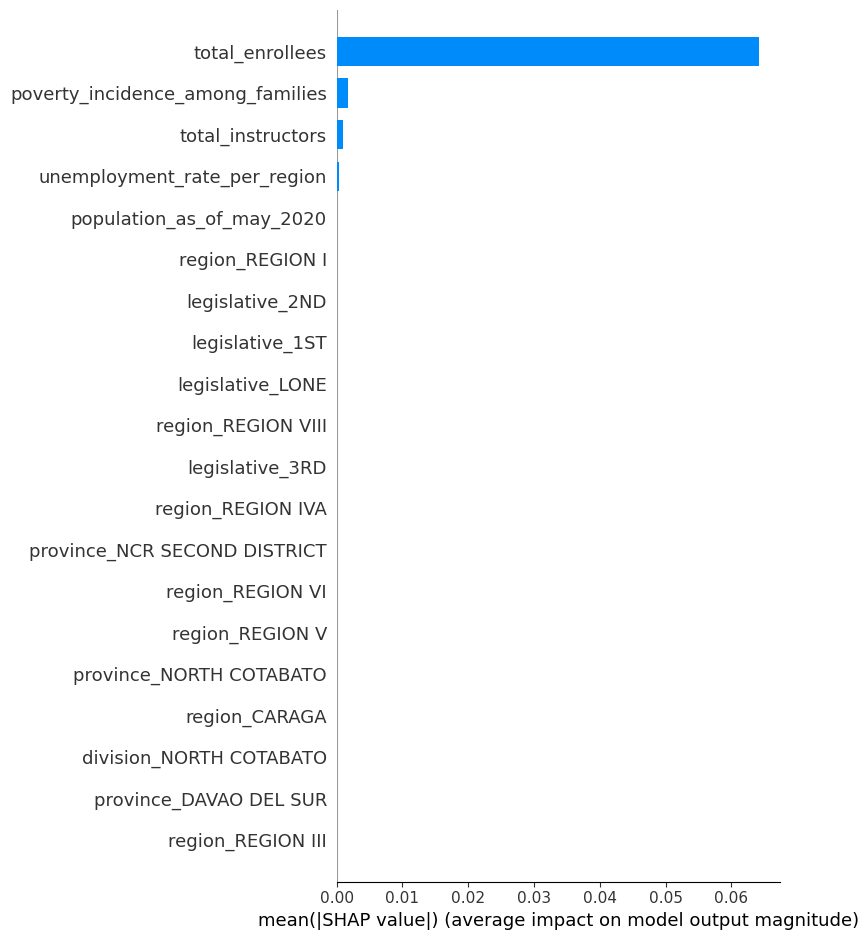

In [140]:
shap.summary_plot(shap_values, X_holdout_new.columns, plot_type='bar')

**<u> Summary Plot </u>**

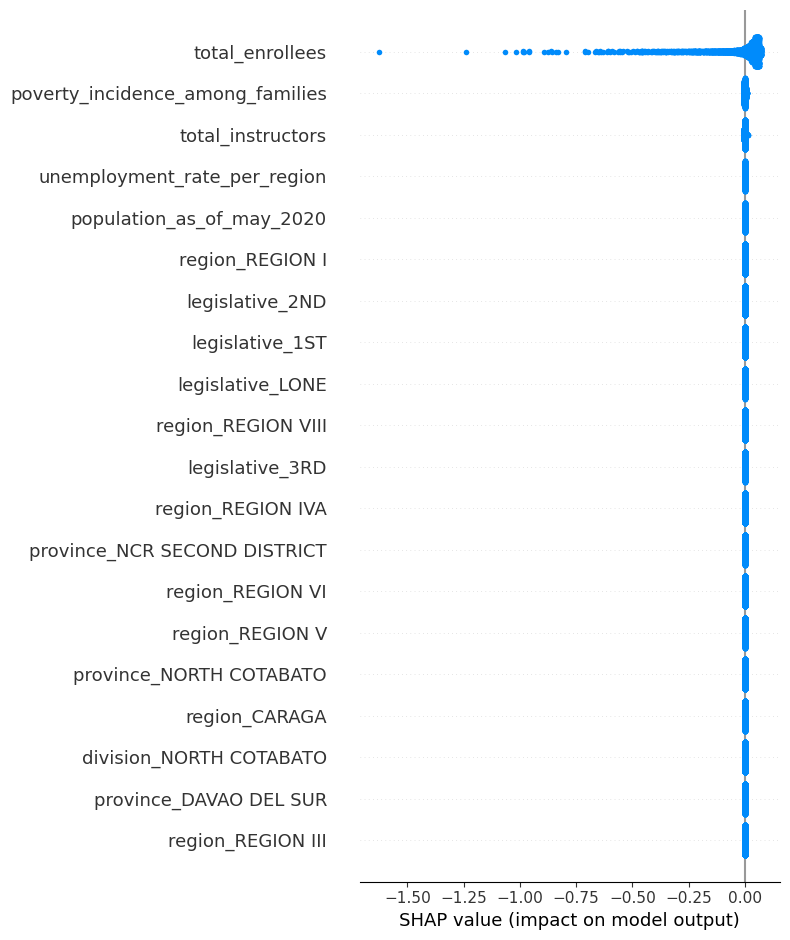

In [144]:
shap.summary_plot(shap_values = shap_values, 
                  features = X_holdout_new.columns)

**<u> Beeswarm </u>**

In [160]:
shap.plots.beeswarm(shap_values)

ValueError: the beeswarm plot requires Explanation object as the `shap_values` argument

**<u> Force Plot </u>**

In [157]:
sample = X_holdout_new.reset_index()
sample[sample['index'] == 343]

,index,total_enrollees,total_instructors,poverty_incidence_among_families,unemployment_rate_per_region,region_ARMM,region_CAR,region_CARAGA,region_NCR,region_REGION I,region_REGION II,region_REGION III,region_REGION IVA,region_REGION IVB,region_REGION IX,region_REGION V,region_REGION VI,region_REGION VII,region_REGION VIII,region_REGION X,region_REGION XI,region_REGION XII,province_ABRA,province_AGUSAN DEL NORTE,province_AGUSAN DEL SUR,province_AKLAN,province_ALBAY,province_ANTIQUE,province_APAYAO,province_AURORA,province_BASILAN,province_BATAAN,province_BATANES,province_BATANGAS,province_BENGUET,province_BILIRAN,province_BOHOL,province_BUKIDNON,province_BULACAN,province_CAGAYAN,province_CAMARINES NORTE,province_CAMARINES SUR,province_CAMIGUIN,province_CAPIZ,province_CATANDUANES,province_CAVITE,province_CEBU,province_CITY OF COTABATO,province_COMPOSTELA VALLEY,province_DAVAO DEL NORTE,province_DAVAO DEL SUR,province_DAVAO ORIENTAL,province_DINAGAT ISLANDS,province_EASTERN SAMAR,province_GUIMARAS,province_IFUGAO,province_ILOCOS NORTE,province_ILOCOS SUR,province_ILOILO,province_ISABELA,province_KALINGA,province_LA UNION,province_LAGUNA,province_LANAO DEL NORTE,province_LANAO DEL SUR,province_LEYTE,province_MAGUINDANAO,"province_MANILA, NCR, FIRST DISTRICT",province_MARINDUQUE,province_MASBATE,province_MISAMIS OCCIDENTAL,province_MISAMIS ORIENTAL,province_MOUNTAIN PROVINCE,province_NCR FOURTH DISTRICT,province_NCR SECOND DISTRICT,province_NCR THIRD DISTRICT,province_NEGROS OCCIDENTAL,province_NEGROS ORIENTAL,province_NORTH COTABATO,province_NORTHERN SAMAR,province_NUEVA ECIJA,province_OCCIDENTAL MINDORO,province_ORIENTAL MINDORO,province_PALAWAN,province_PAMPANGA,province_PANGASINAN,province_QUEZON,province_QUIRINO,province_RIZAL,province_ROMBLON,province_SARANGANI,province_SIQUIJOR,province_SORSOGON,province_SOUTH COTABATO,province_SOUTHERN LEYTE,province_SULTAN KUDARAT,province_SULU,province_SURIGAO DEL NORTE,province_SURIGAO DEL SUR,province_TARLAC,province_TAWI-TAWI,province_WESTERN SAMAR,province_ZAMBALES,province_ZAMBOANGA DEL NORTE,province_ZAMBOANGA DEL SUR,province_ZAMBOANGA SIBUGAY,legislative_1ST,legislative_2ND,legislative_3RD,legislative_4TH,legislative_5TH,legislative_6TH,legislative_7TH,legislative_LONE,division_ABRA,division_AGUSAN DEL NORTE,division_AGUSAN DEL SUR,division_AKLAN,division_ALAMINOS CITY,division_ALBAY,division_ANGELES CITY,division_ANTIPOLO CITY,division_ANTIQUE,division_APAYAO,division_AURORA,division_BACOLOD CITY,division_BAGO CITY,division_BAGUIO CITY,division_BAIS CITY,division_BALANGA CITY,division_BASILAN,division_BATAAN,division_BATANES,division_BATANGAS,division_BATANGAS CITY,division_BAYAWAN CITY,division_BENGUET,division_BILIRAN,division_BISLIG CITY,division_BOGO CITY,division_BOHOL,division_BUKIDNON,division_BULACAN,division_BUTUAN CITY,division_CABANATUAN CITY,division_CADIZ CITY,division_CAGAYAN,division_CAGAYAN DE ORO CITY,division_CALAMBA CITY,division_CALAPAN CITY,division_CALBAYOG CITY,division_CALOOCAN CITY,division_CAMARINES NORTE,division_CAMARINES SUR,division_CAMIGUIN,division_CANDON CITY,division_CAPIZ,division_CARCAR CITY,division_CATANDUANES,division_CAUAYAN CITY,division_CAVITE,division_CAVITE CITY,division_CEBU,division_CEBU CITY,division_CITY OF NAGA CEBU,division_CITY OF SAN JUAN,division_COMPOSTELA VALLEY,division_COTABATO CITY,division_DAGUPAN CITY,division_DANAO CITY,division_DASMARINAS CITY,division_DAVAO CITY,division_DAVAO DEL NORTE,division_DAVAO DEL SUR,division_DAVAO ORIENTAL,division_DIGOS CITY,division_DINAGAT ISLAND,division_DIPOLOG CITY,division_DUMAGUETE CITY,division_EASTERN SAMAR,division_ESCALANTE CITY,division_GAPAN CITY,division_GENERAL SANTOS CITY,division_GINGOOG CITY,division_GUIHULNGAN CITY,division_GUIMARAS,division_IFUGAO,division_ILIGAN CITY,division_ILOCOS NORTE,division_ILOCOS SUR,division_ILOILO,division_ILOILO CITY,division_IRIGA CITY,division_ISABELA,division_ISLAND GARDEN CITY OF SAMAL,division_KABANKALAN CITY,division_KALINGA,division_K

In [237]:
print("Predicted:")
print(y_preds[343])

print("\nActual:")
tester[tester.index == 343]

Predicted:
1

Actual:


,index,school_type
343,6255,1


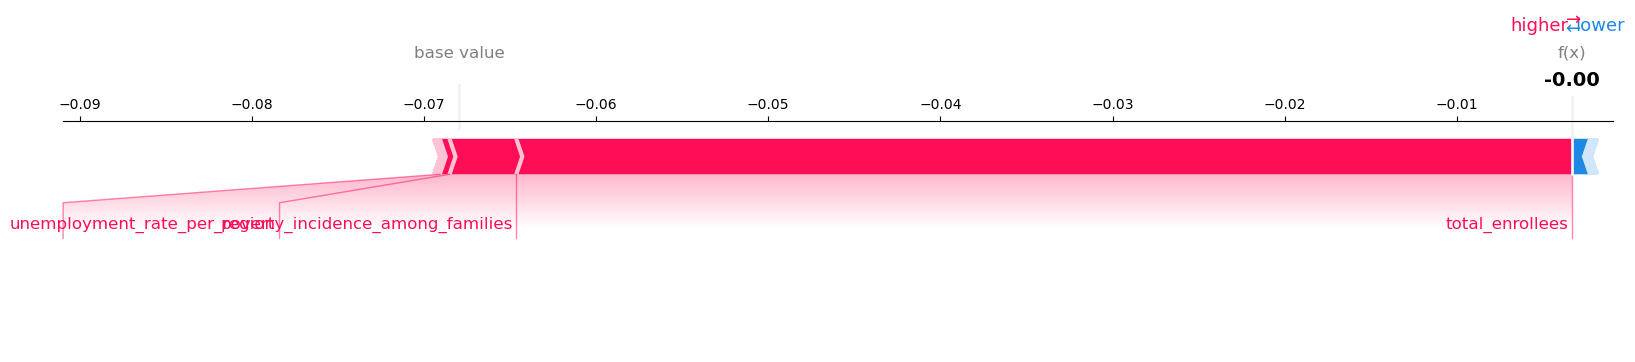

In [156]:
shap.force_plot(explainer.expected_value, 
                shap_values[343], X_holdout_new.columns, matplotlib=True)

In [186]:
y_df = pd.DataFrame(y_preds, columns=['predicted'])

In [188]:
y_df = pd.concat([tester, y_df], axis=1)

In [191]:
y_df.head()

,index,school_type,predicted
0,5670,1,1
1,1322,1,1
2,9144,1,1
3,6641,1,1
4,19,1,1


In [192]:
y_df.loc[(y_df['school_type'] == 0) & (y_df['predicted'] == 0)]

,index,school_type,predicted
898,33,0,0
1673,12605,0,0


In [194]:
print("Predicted:")
print(y_preds[898])

print("\nActual:")
tester[tester.index == 898]

Predicted:
0

Actual:


,index,school_type
898,33,0


In [195]:
sample1 = X_holdout_new.reset_index()
sample1[sample1['index'] == 898]

,index,total_enrollees,total_instructors,poverty_incidence_among_families,unemployment_rate_per_region,region_ARMM,region_CAR,region_CARAGA,region_NCR,region_REGION I,region_REGION II,region_REGION III,region_REGION IVA,region_REGION IVB,region_REGION IX,region_REGION V,region_REGION VI,region_REGION VII,region_REGION VIII,region_REGION X,region_REGION XI,region_REGION XII,province_ABRA,province_AGUSAN DEL NORTE,province_AGUSAN DEL SUR,province_AKLAN,province_ALBAY,province_ANTIQUE,province_APAYAO,province_AURORA,province_BASILAN,province_BATAAN,province_BATANES,province_BATANGAS,province_BENGUET,province_BILIRAN,province_BOHOL,province_BUKIDNON,province_BULACAN,province_CAGAYAN,province_CAMARINES NORTE,province_CAMARINES SUR,province_CAMIGUIN,province_CAPIZ,province_CATANDUANES,province_CAVITE,province_CEBU,province_CITY OF COTABATO,province_COMPOSTELA VALLEY,province_DAVAO DEL NORTE,province_DAVAO DEL SUR,province_DAVAO ORIENTAL,province_DINAGAT ISLANDS,province_EASTERN SAMAR,province_GUIMARAS,province_IFUGAO,province_ILOCOS NORTE,province_ILOCOS SUR,province_ILOILO,province_ISABELA,province_KALINGA,province_LA UNION,province_LAGUNA,province_LANAO DEL NORTE,province_LANAO DEL SUR,province_LEYTE,province_MAGUINDANAO,"province_MANILA, NCR, FIRST DISTRICT",province_MARINDUQUE,province_MASBATE,province_MISAMIS OCCIDENTAL,province_MISAMIS ORIENTAL,province_MOUNTAIN PROVINCE,province_NCR FOURTH DISTRICT,province_NCR SECOND DISTRICT,province_NCR THIRD DISTRICT,province_NEGROS OCCIDENTAL,province_NEGROS ORIENTAL,province_NORTH COTABATO,province_NORTHERN SAMAR,province_NUEVA ECIJA,province_OCCIDENTAL MINDORO,province_ORIENTAL MINDORO,province_PALAWAN,province_PAMPANGA,province_PANGASINAN,province_QUEZON,province_QUIRINO,province_RIZAL,province_ROMBLON,province_SARANGANI,province_SIQUIJOR,province_SORSOGON,province_SOUTH COTABATO,province_SOUTHERN LEYTE,province_SULTAN KUDARAT,province_SULU,province_SURIGAO DEL NORTE,province_SURIGAO DEL SUR,province_TARLAC,province_TAWI-TAWI,province_WESTERN SAMAR,province_ZAMBALES,province_ZAMBOANGA DEL NORTE,province_ZAMBOANGA DEL SUR,province_ZAMBOANGA SIBUGAY,legislative_1ST,legislative_2ND,legislative_3RD,legislative_4TH,legislative_5TH,legislative_6TH,legislative_7TH,legislative_LONE,division_ABRA,division_AGUSAN DEL NORTE,division_AGUSAN DEL SUR,division_AKLAN,division_ALAMINOS CITY,division_ALBAY,division_ANGELES CITY,division_ANTIPOLO CITY,division_ANTIQUE,division_APAYAO,division_AURORA,division_BACOLOD CITY,division_BAGO CITY,division_BAGUIO CITY,division_BAIS CITY,division_BALANGA CITY,division_BASILAN,division_BATAAN,division_BATANES,division_BATANGAS,division_BATANGAS CITY,division_BAYAWAN CITY,division_BENGUET,division_BILIRAN,division_BISLIG CITY,division_BOGO CITY,division_BOHOL,division_BUKIDNON,division_BULACAN,division_BUTUAN CITY,division_CABANATUAN CITY,division_CADIZ CITY,division_CAGAYAN,division_CAGAYAN DE ORO CITY,division_CALAMBA CITY,division_CALAPAN CITY,division_CALBAYOG CITY,division_CALOOCAN CITY,division_CAMARINES NORTE,division_CAMARINES SUR,division_CAMIGUIN,division_CANDON CITY,division_CAPIZ,division_CARCAR CITY,division_CATANDUANES,division_CAUAYAN CITY,division_CAVITE,division_CAVITE CITY,division_CEBU,division_CEBU CITY,division_CITY OF NAGA CEBU,division_CITY OF SAN JUAN,division_COMPOSTELA VALLEY,division_COTABATO CITY,division_DAGUPAN CITY,division_DANAO CITY,division_DASMARINAS CITY,division_DAVAO CITY,division_DAVAO DEL NORTE,division_DAVAO DEL SUR,division_DAVAO ORIENTAL,division_DIGOS CITY,division_DINAGAT ISLAND,division_DIPOLOG CITY,division_DUMAGUETE CITY,division_EASTERN SAMAR,division_ESCALANTE CITY,division_GAPAN CITY,division_GENERAL SANTOS CITY,division_GINGOOG CITY,division_GUIHULNGAN CITY,division_GUIMARAS,division_IFUGAO,division_ILIGAN CITY,division_ILOCOS NORTE,division_ILOCOS SUR,division_ILOILO,division_ILOILO CITY,division_IRIGA CITY,division_ISABELA,division_ISLAND GARDEN CITY OF SAMAL,division_KABANKALAN CITY,division_KALINGA,division_K

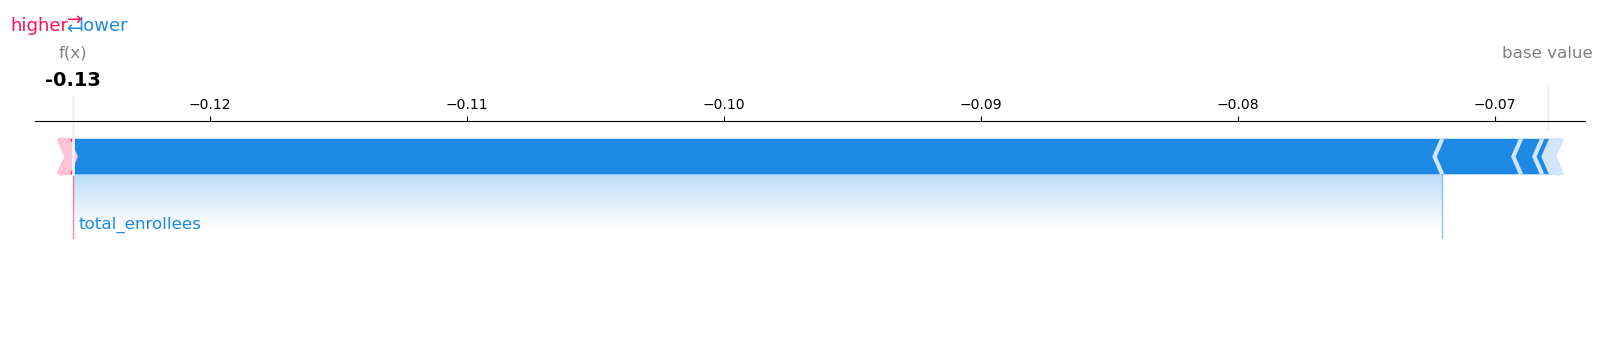

In [196]:
shap.force_plot(explainer.expected_value, 
                shap_values[898], X_holdout_new.columns, matplotlib=True)

In [63]:
# From Day 8 notes - results to an error
# model = rh['logisticregression']
# explainer = shap.LinearExplainer(model, feature_names=X_holdout.columns)
# shap_values = explainer.shap_values(X_holdout, check_additivity=False)
# shap.summary_plot(shap_values, X_holdout.columns, plot_type='bar')

TypeError: __init__() missing 1 required positional argument: 'masker'

In [66]:
# Another source - results to an error
# model = sklearn.linear_model.LogisticRegression(C=0.00001, random_state=890)
# explainer = shap.LinearExplainer(model, X_trainval, feature_names=X_holdout.columns)
# shap_values = explainer(X_holdout)
# shap.summary_plot(shap_values, X_holdout.columns, plot_type='bar')

InvalidModelError: An unknown model type was passed: <class 'sklearn.linear_model._logistic.LogisticRegression'>

--------------

## Random Forest

In [202]:
X_holdout_new.head(n=3)

,total_enrollees,total_instructors,poverty_incidence_among_families,unemployment_rate_per_region,region_ARMM,region_CAR,region_CARAGA,region_NCR,region_REGION I,region_REGION II,region_REGION III,region_REGION IVA,region_REGION IVB,region_REGION IX,region_REGION V,region_REGION VI,region_REGION VII,region_REGION VIII,region_REGION X,region_REGION XI,region_REGION XII,province_ABRA,province_AGUSAN DEL NORTE,province_AGUSAN DEL SUR,province_AKLAN,province_ALBAY,province_ANTIQUE,province_APAYAO,province_AURORA,province_BASILAN,province_BATAAN,province_BATANES,province_BATANGAS,province_BENGUET,province_BILIRAN,province_BOHOL,province_BUKIDNON,province_BULACAN,province_CAGAYAN,province_CAMARINES NORTE,province_CAMARINES SUR,province_CAMIGUIN,province_CAPIZ,province_CATANDUANES,province_CAVITE,province_CEBU,province_CITY OF COTABATO,province_COMPOSTELA VALLEY,province_DAVAO DEL NORTE,province_DAVAO DEL SUR,province_DAVAO ORIENTAL,province_DINAGAT ISLANDS,province_EASTERN SAMAR,province_GUIMARAS,province_IFUGAO,province_ILOCOS NORTE,province_ILOCOS SUR,province_ILOILO,province_ISABELA,province_KALINGA,province_LA UNION,province_LAGUNA,province_LANAO DEL NORTE,province_LANAO DEL SUR,province_LEYTE,province_MAGUINDANAO,"province_MANILA, NCR, FIRST DISTRICT",province_MARINDUQUE,province_MASBATE,province_MISAMIS OCCIDENTAL,province_MISAMIS ORIENTAL,province_MOUNTAIN PROVINCE,province_NCR FOURTH DISTRICT,province_NCR SECOND DISTRICT,province_NCR THIRD DISTRICT,province_NEGROS OCCIDENTAL,province_NEGROS ORIENTAL,province_NORTH COTABATO,province_NORTHERN SAMAR,province_NUEVA ECIJA,province_OCCIDENTAL MINDORO,province_ORIENTAL MINDORO,province_PALAWAN,province_PAMPANGA,province_PANGASINAN,province_QUEZON,province_QUIRINO,province_RIZAL,province_ROMBLON,province_SARANGANI,province_SIQUIJOR,province_SORSOGON,province_SOUTH COTABATO,province_SOUTHERN LEYTE,province_SULTAN KUDARAT,province_SULU,province_SURIGAO DEL NORTE,province_SURIGAO DEL SUR,province_TARLAC,province_TAWI-TAWI,province_WESTERN SAMAR,province_ZAMBALES,province_ZAMBOANGA DEL NORTE,province_ZAMBOANGA DEL SUR,province_ZAMBOANGA SIBUGAY,legislative_1ST,legislative_2ND,legislative_3RD,legislative_4TH,legislative_5TH,legislative_6TH,legislative_7TH,legislative_LONE,division_ABRA,division_AGUSAN DEL NORTE,division_AGUSAN DEL SUR,division_AKLAN,division_ALAMINOS CITY,division_ALBAY,division_ANGELES CITY,division_ANTIPOLO CITY,division_ANTIQUE,division_APAYAO,division_AURORA,division_BACOLOD CITY,division_BAGO CITY,division_BAGUIO CITY,division_BAIS CITY,division_BALANGA CITY,division_BASILAN,division_BATAAN,division_BATANES,division_BATANGAS,division_BATANGAS CITY,division_BAYAWAN CITY,division_BENGUET,division_BILIRAN,division_BISLIG CITY,division_BOGO CITY,division_BOHOL,division_BUKIDNON,division_BULACAN,division_BUTUAN CITY,division_CABANATUAN CITY,division_CADIZ CITY,division_CAGAYAN,division_CAGAYAN DE ORO CITY,division_CALAMBA CITY,division_CALAPAN CITY,division_CALBAYOG CITY,division_CALOOCAN CITY,division_CAMARINES NORTE,division_CAMARINES SUR,division_CAMIGUIN,division_CANDON CITY,division_CAPIZ,division_CARCAR CITY,division_CATANDUANES,division_CAUAYAN CITY,division_CAVITE,division_CAVITE CITY,division_CEBU,division_CEBU CITY,division_CITY OF NAGA CEBU,division_CITY OF SAN JUAN,division_COMPOSTELA VALLEY,division_COTABATO CITY,division_DAGUPAN CITY,division_DANAO CITY,division_DASMARINAS CITY,division_DAVAO CITY,division_DAVAO DEL NORTE,division_DAVAO DEL SUR,division_DAVAO ORIENTAL,division_DIGOS CITY,division_DINAGAT ISLAND,division_DIPOLOG CITY,division_DUMAGUETE CITY,division_EASTERN SAMAR,division_ESCALANTE CITY,division_GAPAN CITY,division_GENERAL SANTOS CITY,division_GINGOOG CITY,division_GUIHULNGAN CITY,division_GUIMARAS,division_IFUGAO,division_ILIGAN CITY,division_ILOCOS NORTE,division_ILOCOS SUR,division_ILOILO,division_ILOILO CITY,division_IRIGA CITY,division_ISABELA,division_ISLAND GARDEN CITY OF SAMAL,division_KABANKALAN CITY,division_KALINGA,division_KIDAPAW

In [238]:
model_rf = joblib.load(r'C:\Users\Jamie\esk\esk_sprint2\project_sprint2\rf_tk.pkl')

In [278]:
model_rf

RandomForestClassifier(max_depth=5, max_features='sqrt', n_estimators=300,
                       random_state=143)

In [280]:
model_rf.fit(X_trainval, y_trainval)

TypeError: Cannot clone object ''deprecated'' (type <class 'str'>): it does not seem to be a scikit-learn estimator as it does not implement a 'get_params' method.

In [ ]:
rf_y_preds = model_rf.predict(X_holdout)
rf_rh_holdout_score = recall_score(y_holdout, rf_y_preds)

In [240]:
explainer_rf = shap.TreeExplainer(model_rf, feature_names = X_holdout_new.columns)

In [241]:
shap_values_rf = explainer_rf.shap_values(X_holdout_new)

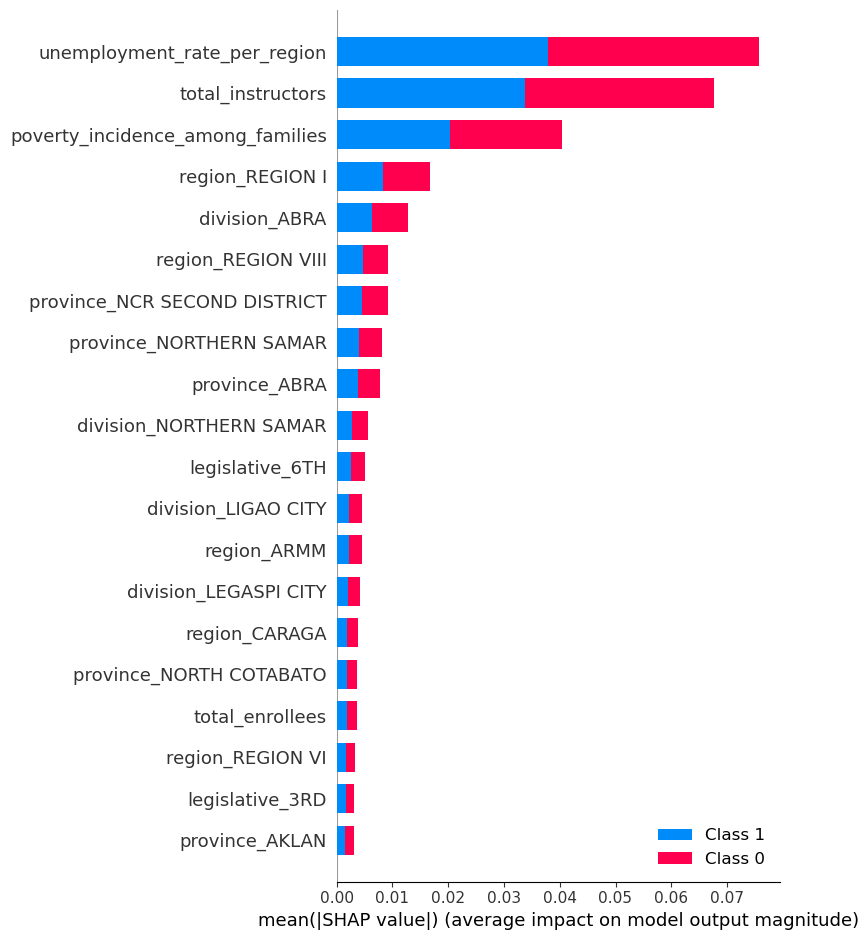

In [242]:
shap.summary_plot(shap_values = shap_values_rf, 
                  features    = X_holdout_new.columns, 
                  plot_type   = "bar")

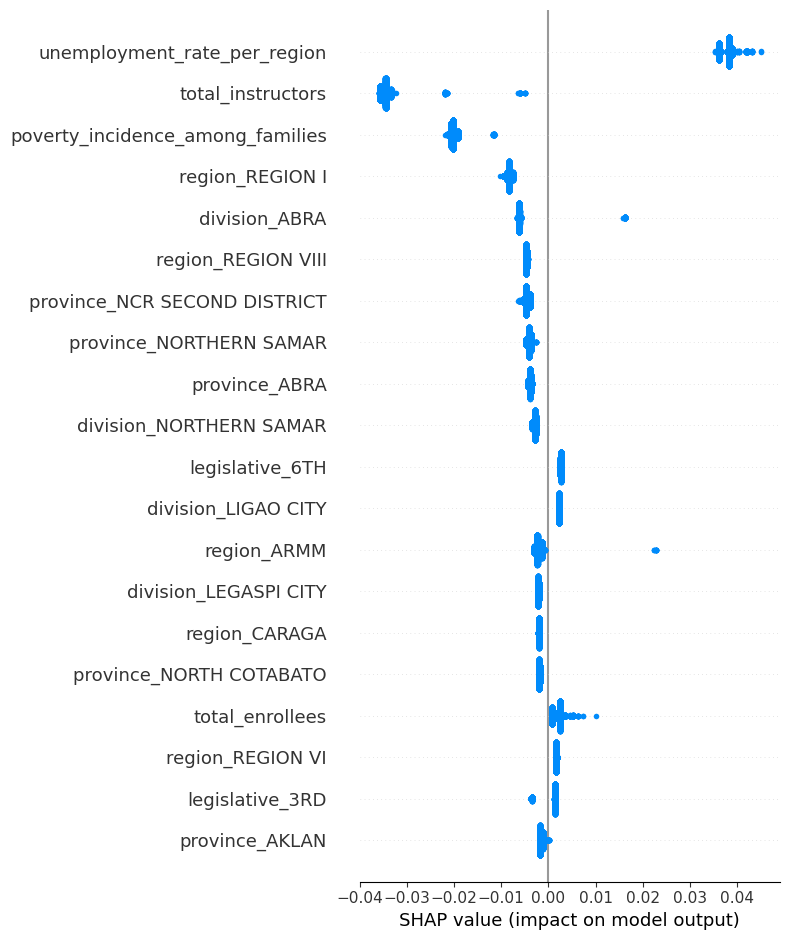

In [255]:
# Extension
shap.summary_plot(shap_values = shap_values_rf[0], 
                  features    = X_holdout_new.columns,
                  plot_type   = 'dot'
                  )

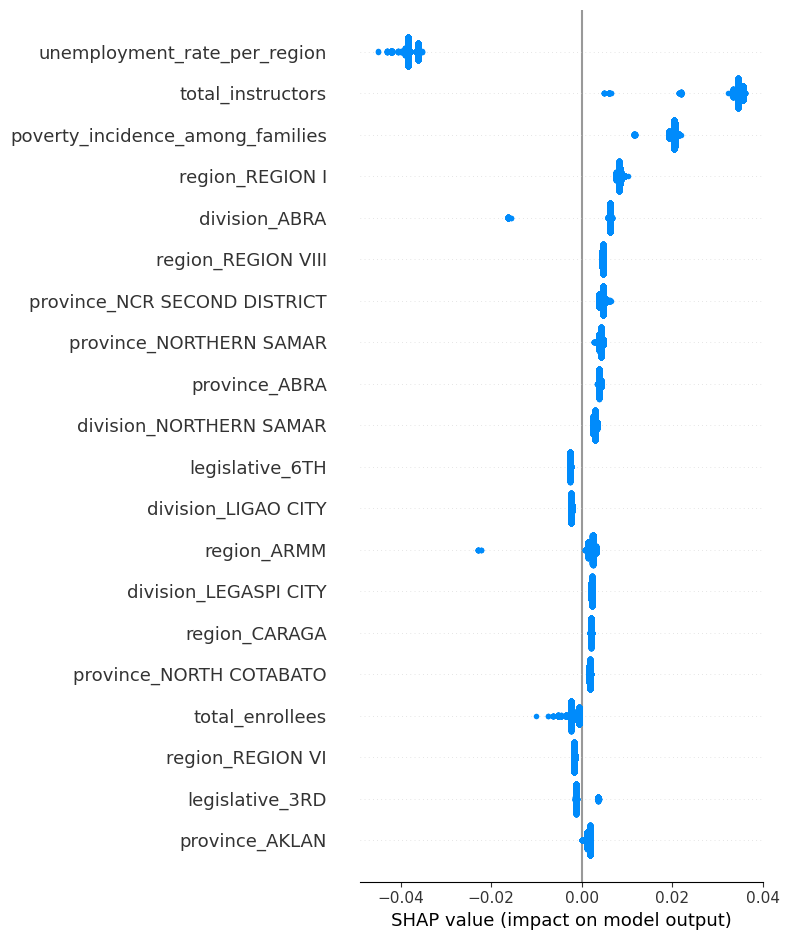

In [256]:
# Lone
shap.summary_plot(shap_values = shap_values_rf[1], 
                  features    = X_holdout_new.columns,
                  plot_type   = 'dot'
                  )

In [263]:
# shap.plots.beeswarm(shap_values_rf)

In [211]:
print("Predicted:")
print(y_preds[343])

print("\nActual:")
tester[tester.index == 343]

Predicted:
1

Actual:


,index,school_type
343,6255,1


In [268]:
shap.force_plot(explainer_rf.expected_value, 
                tester.index[343], X_holdout_new.columns, matplotlib=True)

Exception: In v0.20 force_plot now requires the base value as the first parameter! Try shap.force_plot(explainer.expected_value, shap_values) or for multi-output models try shap.force_plot(explainer.expected_value[0], shap_values[0]).

In [262]:
shap_values_rf

[array([[ 2.37117734e-03, -3.44012402e-02, -2.03009010e-02, ...,
          4.41629136e-06, -1.08838599e-04,  4.45501913e-05],
        [ 2.37117734e-03, -3.44012402e-02, -2.03009010e-02, ...,
          4.41629136e-06, -1.08838599e-04,  4.45501913e-05],
        [ 1.26972528e-03, -3.42500420e-02, -1.92602317e-02, ...,
          4.41629136e-06, -9.28334820e-05,  4.45501913e-05],
        ...,
        [ 3.73668601e-03, -4.93083409e-03, -2.09519203e-02, ...,
          4.41629136e-06, -1.08838599e-04,  4.45501913e-05],
        [ 6.62099840e-04, -3.45346950e-02, -2.08168674e-02, ...,
          4.41629136e-06, -1.08838599e-04,  4.45501913e-05],
        [ 2.37117734e-03, -3.44012402e-02, -2.03009010e-02, ...,
          4.41629136e-06, -1.08838599e-04,  4.45501913e-05]]),
 array([[-2.37117734e-03,  3.44012402e-02,  2.03009010e-02, ...,
         -4.41629136e-06,  1.08838599e-04, -4.45501913e-05],
        [-2.37117734e-03,  3.44012402e-02,  2.03009010e-02, ...,
         -4.41629136e-06,  1.08838599e

**Calculate Shap values**<br>
choosen_instance = X_test.loc[[421]]<br>
shap_values = explainer.shap_values(choosen_instance)<br>
shap.initjs()<br>
shap.force_plot(explainer.expected_value[1], shap_values[1], choosen_instance)

In [272]:
X_holdout_new.loc[[343]]

,total_enrollees,total_instructors,poverty_incidence_among_families,unemployment_rate_per_region,region_ARMM,region_CAR,region_CARAGA,region_NCR,region_REGION I,region_REGION II,region_REGION III,region_REGION IVA,region_REGION IVB,region_REGION IX,region_REGION V,region_REGION VI,region_REGION VII,region_REGION VIII,region_REGION X,region_REGION XI,region_REGION XII,province_ABRA,province_AGUSAN DEL NORTE,province_AGUSAN DEL SUR,province_AKLAN,province_ALBAY,province_ANTIQUE,province_APAYAO,province_AURORA,province_BASILAN,province_BATAAN,province_BATANES,province_BATANGAS,province_BENGUET,province_BILIRAN,province_BOHOL,province_BUKIDNON,province_BULACAN,province_CAGAYAN,province_CAMARINES NORTE,province_CAMARINES SUR,province_CAMIGUIN,province_CAPIZ,province_CATANDUANES,province_CAVITE,province_CEBU,province_CITY OF COTABATO,province_COMPOSTELA VALLEY,province_DAVAO DEL NORTE,province_DAVAO DEL SUR,province_DAVAO ORIENTAL,province_DINAGAT ISLANDS,province_EASTERN SAMAR,province_GUIMARAS,province_IFUGAO,province_ILOCOS NORTE,province_ILOCOS SUR,province_ILOILO,province_ISABELA,province_KALINGA,province_LA UNION,province_LAGUNA,province_LANAO DEL NORTE,province_LANAO DEL SUR,province_LEYTE,province_MAGUINDANAO,"province_MANILA, NCR, FIRST DISTRICT",province_MARINDUQUE,province_MASBATE,province_MISAMIS OCCIDENTAL,province_MISAMIS ORIENTAL,province_MOUNTAIN PROVINCE,province_NCR FOURTH DISTRICT,province_NCR SECOND DISTRICT,province_NCR THIRD DISTRICT,province_NEGROS OCCIDENTAL,province_NEGROS ORIENTAL,province_NORTH COTABATO,province_NORTHERN SAMAR,province_NUEVA ECIJA,province_OCCIDENTAL MINDORO,province_ORIENTAL MINDORO,province_PALAWAN,province_PAMPANGA,province_PANGASINAN,province_QUEZON,province_QUIRINO,province_RIZAL,province_ROMBLON,province_SARANGANI,province_SIQUIJOR,province_SORSOGON,province_SOUTH COTABATO,province_SOUTHERN LEYTE,province_SULTAN KUDARAT,province_SULU,province_SURIGAO DEL NORTE,province_SURIGAO DEL SUR,province_TARLAC,province_TAWI-TAWI,province_WESTERN SAMAR,province_ZAMBALES,province_ZAMBOANGA DEL NORTE,province_ZAMBOANGA DEL SUR,province_ZAMBOANGA SIBUGAY,legislative_1ST,legislative_2ND,legislative_3RD,legislative_4TH,legislative_5TH,legislative_6TH,legislative_7TH,legislative_LONE,division_ABRA,division_AGUSAN DEL NORTE,division_AGUSAN DEL SUR,division_AKLAN,division_ALAMINOS CITY,division_ALBAY,division_ANGELES CITY,division_ANTIPOLO CITY,division_ANTIQUE,division_APAYAO,division_AURORA,division_BACOLOD CITY,division_BAGO CITY,division_BAGUIO CITY,division_BAIS CITY,division_BALANGA CITY,division_BASILAN,division_BATAAN,division_BATANES,division_BATANGAS,division_BATANGAS CITY,division_BAYAWAN CITY,division_BENGUET,division_BILIRAN,division_BISLIG CITY,division_BOGO CITY,division_BOHOL,division_BUKIDNON,division_BULACAN,division_BUTUAN CITY,division_CABANATUAN CITY,division_CADIZ CITY,division_CAGAYAN,division_CAGAYAN DE ORO CITY,division_CALAMBA CITY,division_CALAPAN CITY,division_CALBAYOG CITY,division_CALOOCAN CITY,division_CAMARINES NORTE,division_CAMARINES SUR,division_CAMIGUIN,division_CANDON CITY,division_CAPIZ,division_CARCAR CITY,division_CATANDUANES,division_CAUAYAN CITY,division_CAVITE,division_CAVITE CITY,division_CEBU,division_CEBU CITY,division_CITY OF NAGA CEBU,division_CITY OF SAN JUAN,division_COMPOSTELA VALLEY,division_COTABATO CITY,division_DAGUPAN CITY,division_DANAO CITY,division_DASMARINAS CITY,division_DAVAO CITY,division_DAVAO DEL NORTE,division_DAVAO DEL SUR,division_DAVAO ORIENTAL,division_DIGOS CITY,division_DINAGAT ISLAND,division_DIPOLOG CITY,division_DUMAGUETE CITY,division_EASTERN SAMAR,division_ESCALANTE CITY,division_GAPAN CITY,division_GENERAL SANTOS CITY,division_GINGOOG CITY,division_GUIHULNGAN CITY,division_GUIMARAS,division_IFUGAO,division_ILIGAN CITY,division_ILOCOS NORTE,division_ILOCOS SUR,division_ILOILO,division_ILOILO CITY,division_IRIGA CITY,division_ISABELA,division_ISLAND GARDEN CITY OF SAMAL,division_KABANKALAN CITY,division_KALINGA,division_KIDAPAW

In [276]:
y_holdout.index[343]

6255

In [270]:
chosen_instance = X_holdout_new.loc[[343]]
sv_1 = explainer_rf.shap_values(chosen_instance)
shap.force_plot(explainer_rf.expected_value[1], sv_1[1], chosen_instance)

In [271]:
chosen_instance = X_holdout_new.loc[[343]]
sv_1 = explainer_rf.shap_values(chosen_instance)
shap.force_plot(explainer_rf.expected_value[0], sv_1[0], chosen_instance)

## Light GBM

In [202]:
X_holdout_new.head(n=3)

,total_enrollees,total_instructors,poverty_incidence_among_families,unemployment_rate_per_region,region_ARMM,region_CAR,region_CARAGA,region_NCR,region_REGION I,region_REGION II,region_REGION III,region_REGION IVA,region_REGION IVB,region_REGION IX,region_REGION V,region_REGION VI,region_REGION VII,region_REGION VIII,region_REGION X,region_REGION XI,region_REGION XII,province_ABRA,province_AGUSAN DEL NORTE,province_AGUSAN DEL SUR,province_AKLAN,province_ALBAY,province_ANTIQUE,province_APAYAO,province_AURORA,province_BASILAN,province_BATAAN,province_BATANES,province_BATANGAS,province_BENGUET,province_BILIRAN,province_BOHOL,province_BUKIDNON,province_BULACAN,province_CAGAYAN,province_CAMARINES NORTE,province_CAMARINES SUR,province_CAMIGUIN,province_CAPIZ,province_CATANDUANES,province_CAVITE,province_CEBU,province_CITY OF COTABATO,province_COMPOSTELA VALLEY,province_DAVAO DEL NORTE,province_DAVAO DEL SUR,province_DAVAO ORIENTAL,province_DINAGAT ISLANDS,province_EASTERN SAMAR,province_GUIMARAS,province_IFUGAO,province_ILOCOS NORTE,province_ILOCOS SUR,province_ILOILO,province_ISABELA,province_KALINGA,province_LA UNION,province_LAGUNA,province_LANAO DEL NORTE,province_LANAO DEL SUR,province_LEYTE,province_MAGUINDANAO,"province_MANILA, NCR, FIRST DISTRICT",province_MARINDUQUE,province_MASBATE,province_MISAMIS OCCIDENTAL,province_MISAMIS ORIENTAL,province_MOUNTAIN PROVINCE,province_NCR FOURTH DISTRICT,province_NCR SECOND DISTRICT,province_NCR THIRD DISTRICT,province_NEGROS OCCIDENTAL,province_NEGROS ORIENTAL,province_NORTH COTABATO,province_NORTHERN SAMAR,province_NUEVA ECIJA,province_OCCIDENTAL MINDORO,province_ORIENTAL MINDORO,province_PALAWAN,province_PAMPANGA,province_PANGASINAN,province_QUEZON,province_QUIRINO,province_RIZAL,province_ROMBLON,province_SARANGANI,province_SIQUIJOR,province_SORSOGON,province_SOUTH COTABATO,province_SOUTHERN LEYTE,province_SULTAN KUDARAT,province_SULU,province_SURIGAO DEL NORTE,province_SURIGAO DEL SUR,province_TARLAC,province_TAWI-TAWI,province_WESTERN SAMAR,province_ZAMBALES,province_ZAMBOANGA DEL NORTE,province_ZAMBOANGA DEL SUR,province_ZAMBOANGA SIBUGAY,legislative_1ST,legislative_2ND,legislative_3RD,legislative_4TH,legislative_5TH,legislative_6TH,legislative_7TH,legislative_LONE,division_ABRA,division_AGUSAN DEL NORTE,division_AGUSAN DEL SUR,division_AKLAN,division_ALAMINOS CITY,division_ALBAY,division_ANGELES CITY,division_ANTIPOLO CITY,division_ANTIQUE,division_APAYAO,division_AURORA,division_BACOLOD CITY,division_BAGO CITY,division_BAGUIO CITY,division_BAIS CITY,division_BALANGA CITY,division_BASILAN,division_BATAAN,division_BATANES,division_BATANGAS,division_BATANGAS CITY,division_BAYAWAN CITY,division_BENGUET,division_BILIRAN,division_BISLIG CITY,division_BOGO CITY,division_BOHOL,division_BUKIDNON,division_BULACAN,division_BUTUAN CITY,division_CABANATUAN CITY,division_CADIZ CITY,division_CAGAYAN,division_CAGAYAN DE ORO CITY,division_CALAMBA CITY,division_CALAPAN CITY,division_CALBAYOG CITY,division_CALOOCAN CITY,division_CAMARINES NORTE,division_CAMARINES SUR,division_CAMIGUIN,division_CANDON CITY,division_CAPIZ,division_CARCAR CITY,division_CATANDUANES,division_CAUAYAN CITY,division_CAVITE,division_CAVITE CITY,division_CEBU,division_CEBU CITY,division_CITY OF NAGA CEBU,division_CITY OF SAN JUAN,division_COMPOSTELA VALLEY,division_COTABATO CITY,division_DAGUPAN CITY,division_DANAO CITY,division_DASMARINAS CITY,division_DAVAO CITY,division_DAVAO DEL NORTE,division_DAVAO DEL SUR,division_DAVAO ORIENTAL,division_DIGOS CITY,division_DINAGAT ISLAND,division_DIPOLOG CITY,division_DUMAGUETE CITY,division_EASTERN SAMAR,division_ESCALANTE CITY,division_GAPAN CITY,division_GENERAL SANTOS CITY,division_GINGOOG CITY,division_GUIHULNGAN CITY,division_GUIMARAS,division_IFUGAO,division_ILIGAN CITY,division_ILOCOS NORTE,division_ILOCOS SUR,division_ILOILO,division_ILOILO CITY,division_IRIGA CITY,division_ISABELA,division_ISLAND GARDEN CITY OF SAMAL,division_KABANKALAN CITY,division_KALINGA,division_KIDAPAW

In [215]:
model_gbm = joblib.load(r'C:\Users\Jamie\esk\esk_sprint2\project_sprint2\lgbm.pkl')

In [216]:
model_gbm

GradientBoostingClassifier(learning_rate=1, loss='log_loss', n_estimators=1,
                           random_state=143)

In [217]:
explainer_gbm = shap.TreeExplainer(model_gbm, feature_names = X_holdout_new.columns)

In [232]:
shap_values_gbm = explainer_gbm.shap_values(X_holdout_new)

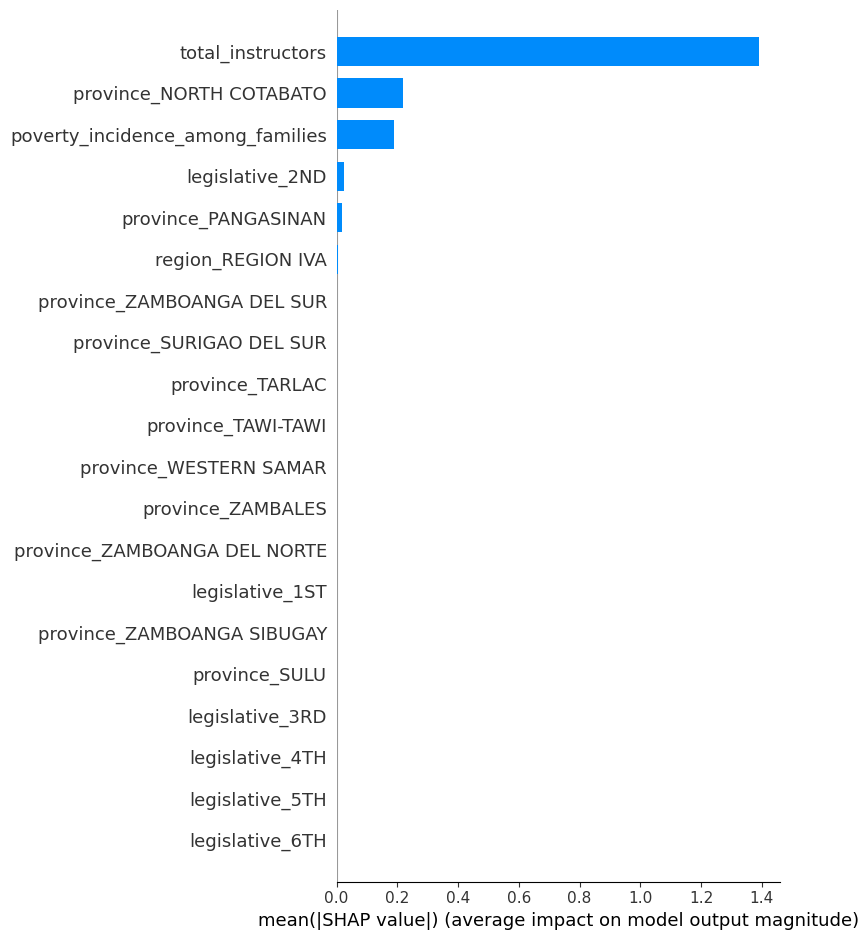

In [260]:
shap.summary_plot(shap_values = shap_values_gbm, 
                  features    = X_holdout_new.columns, 
                  plot_type   = "bar")

In [261]:
shap_values_gbm

array([[ 0.        ,  1.40901803,  0.17904476, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  1.40901803,  0.17904476, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  1.40901803,  0.17904476, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        , -0.18918716,  0.30042346, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  1.40901803,  0.18299538, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  1.40901803,  0.17904476, ...,  0.        ,
         0.        ,  0.        ]])

In [257]:
# Extension
shap.summary_plot(shap_values = shap_values_gbm[0], 
                  features    = X_holdout_new.columns,
                  plot_type   = 'dot'
                  )

AssertionError: Summary plots need a matrix of shap_values, not a vector.

In [258]:
# Lone
shap.summary_plot(shap_values = shap_values_gbm[1], 
                  features    = X_holdout_new.columns,
                  plot_type   = 'dot'
                  )

AssertionError: Summary plots need a matrix of shap_values, not a vector.

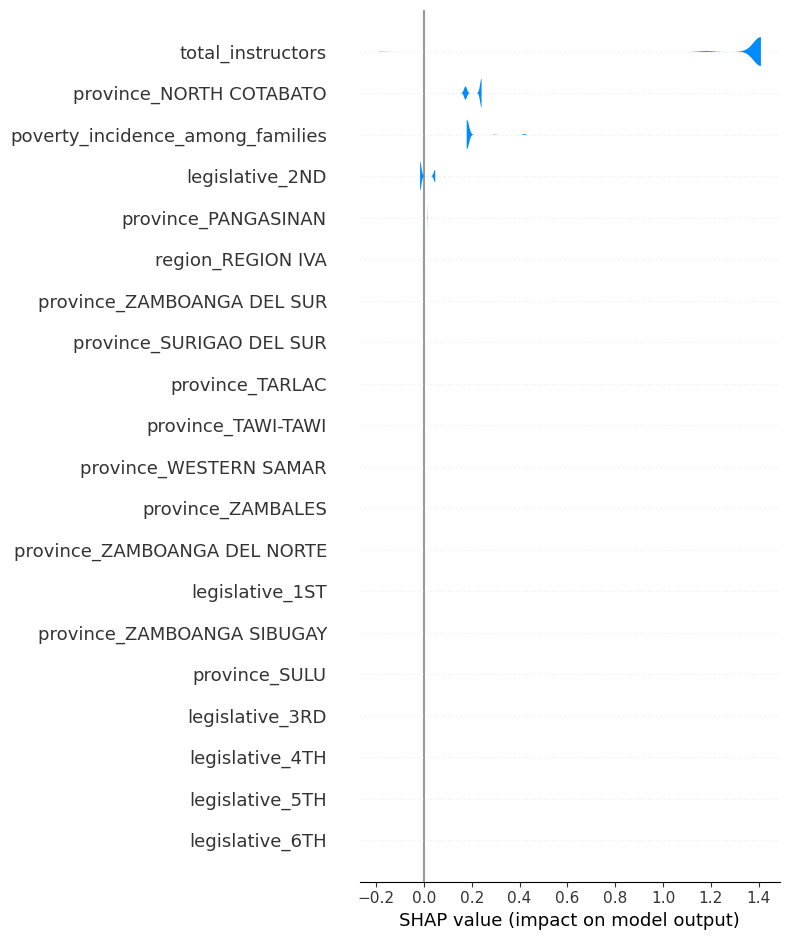

In [234]:
shap.summary_plot(shap_values = shap_values_gbm, 
                  features    = X_holdout_new.columns, 
                  plot_type   = "violin")

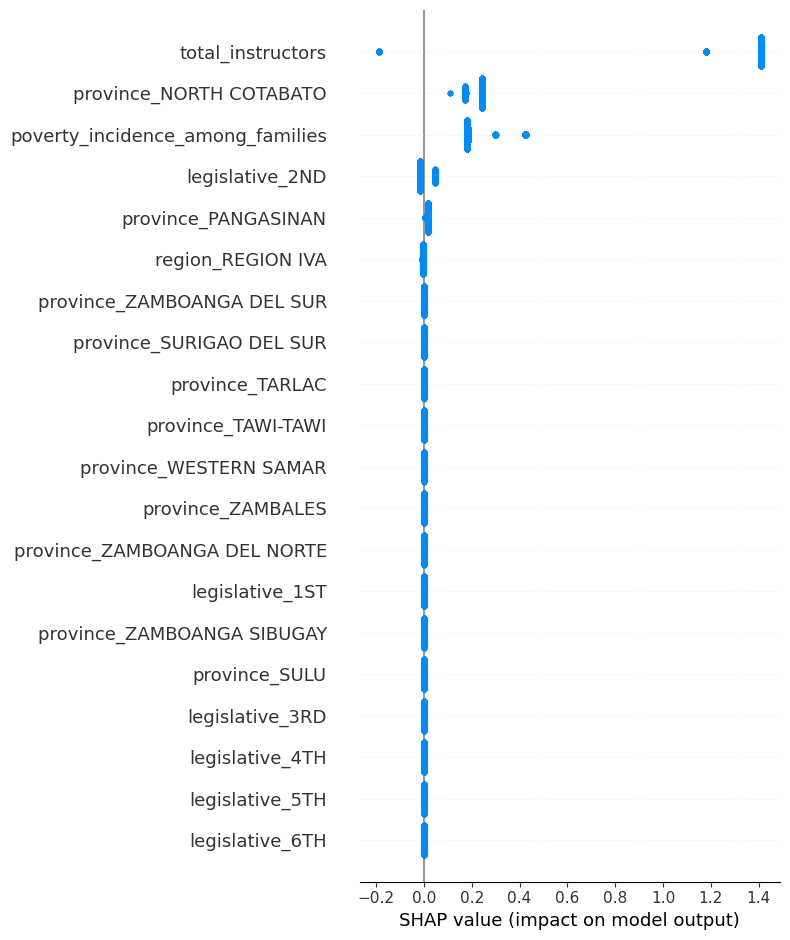

In [245]:
shap.summary_plot(shap_values = shap_values_gbm, 
                  features = X_holdout_new.columns)

In [235]:
shap.plots.beeswarm(shap_values_gbm)

ValueError: the beeswarm plot requires Explanation object as the `shap_values` argument

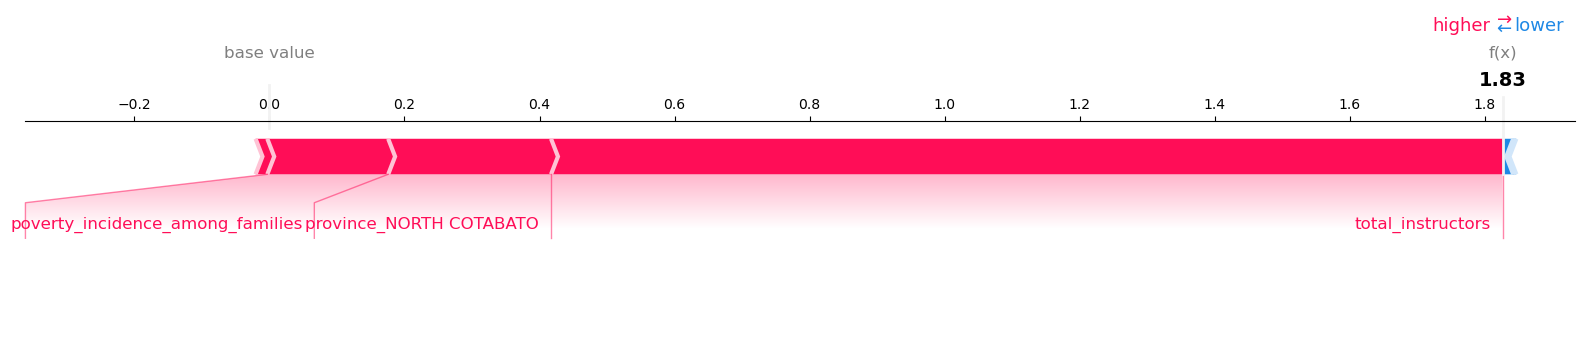

In [236]:
shap.force_plot(explainer_gbm.expected_value, 
                shap_values_gbm[343], X_holdout_new.columns, matplotlib=True)

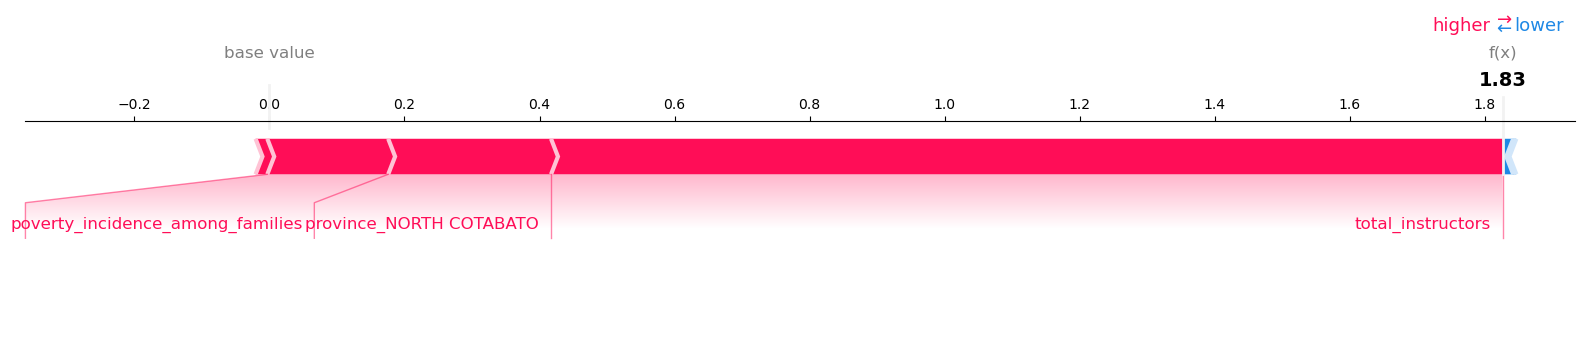

In [247]:
shap.force_plot(explainer_gbm.expected_value, 
                shap_values_gbm[898], X_holdout_new.columns, matplotlib=True)

-------------